# Importation du fichier initial

In [1]:
import numpy as np
import pandas as pd
import csv
import pickle

train_enz = pd.read_csv(r'C:\Users\leper\OneDrive\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\train.csv', encoding ='utf8')
train_enz

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [2]:
train_enz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


On peut ici voir, que nous avons 5 colonnes. L'une d'elle, data_source, ne nous sera pas d'utilité pour ce projet, nous pouvons donc la supprimer.

In [3]:
train_enz=train_enz.drop(['data_source'],axis=1)

# Importation du fichier contenant les lignes modifiées

In [4]:
train_enz_2 = pd.read_csv(r'C:\Users\leper\OneDrive\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\train_updates_20220929.csv', encoding ='utf8')
train_enz_2

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2429,30738,NaN,NaN,NaN,NaN
2430,30739,NaN,NaN,NaN,NaN
2431,30740,NaN,NaN,NaN,NaN
2432,30741,NaN,NaN,NaN,NaN


In [5]:
train_enz_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


# Remplacement des données modifiées dans le premier dataset

In [6]:
train_enz_modif=train_enz_2.loc[(train_enz_2['protein_sequence'].notna())|(train_enz_2['pH'].notna())|(train_enz_2['tm'].notna())]

In [7]:
train_enz_modif

,seq_id,protein_sequence,pH,data_source,tm
25,973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,48.4
28,986,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...,7.0,NaN,48.4
29,988,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,7.0,NaN,49.0
30,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,NaN,55.6
33,1003,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...,7.0,NaN,48.4
38,1012,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,48.4
39,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6
40,1018,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,49.0
46,1037,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,49.0
47,1042,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,48.4


Transformons la colonne seq id en index

In [8]:
train_enz_modif.set_index('seq_id',inplace=True)

In [9]:
list_modif=train_enz_modif.index.tolist()

In [10]:
for i in list_modif:
    train_enz.at[i,'protein_sequence']=train_enz_modif.at[i,'protein_sequence']
    train_enz.at[i,'pH']=train_enz_modif.at[i,'pH']
    train_enz.at[i,'tm']=train_enz_modif.at[i,'tm']

# Observation des doublons

In [11]:
train_enz.loc[train_enz[['protein_sequence','pH']].duplicated(keep=False),:]

,seq_id,protein_sequence,pH,tm
972,972,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,45.2
973,973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,48.4
974,974,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,48.0
982,982,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...,7.0,31.8
983,983,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...,7.0,52.6
...,...,...,...,...
30797,30797,TLSKSDAKKAASKMLLEKTQFSDKPVQDRGLVVTDIKAEDVVLEHR...,7.0,54.6
31079,31079,VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...,7.0,52.2
31080,31080,VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...,7.0,56.3
31271,31271,YFIMACDQYSCSLTAPALDIATGHASLADIWAKTPPVTAKAAQLYA...,7.0,51.3


Nous voyons ici qu'il y a plusieurs doublons, cependant, il faut prendre en compte que ces proteines ont également pu être testé dans des dilutions diverses ce qui entraine cette différence de tm entre proteine de même séquence testées au même pH.

# Observation des valeurs abberantes 

## Colonne protein sequence

In [12]:
train_enz['protein_sequence'].describe()

count                                                 31390
unique                                                28981
top       MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
freq                                                     14
Name: protein_sequence, dtype: object

On voit ainsi, que nous avons 28981 séquences protéiniques différentes, dont une qui a été testée 14 fois.

## Colonne pH

In [13]:
train_enz['pH'].describe()

count    31104.000000
mean         6.856534
std          1.009352
min          1.990000
25%          7.000000
50%          7.000000
75%          7.000000
max         53.400000
Name: pH, dtype: float64

On voit ici, que le nombre min est de 1.99 et le max est de 53.4. Hors on sait qu'un pH varie entre 0 et 14. Observons les valeurs au dessus de 14 de plus près.

In [14]:
train_enz.loc[train_enz['pH']>14]

,seq_id,protein_sequence,pH,tm
22116,22116,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,0.1
22123,22123,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,1.2
22131,22131,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,0.6
22145,22145,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,0.1


Remplaçons ces valeurs par des valeurs nulles.

In [15]:
ph_abb=train_enz.loc[train_enz['pH']>14].index.tolist()
for i in ph_abb:
    train_enz.at[i,'pH']=np.nan
train_enz.loc[train_enz['pH']>14]   

,seq_id,protein_sequence,pH,tm


## Colonne Température de fusion

In [16]:
train_enz['tm'].describe()

count    31390.000000
mean        49.183202
std         13.957499
min         -1.000000
25%         42.100000
50%         48.000000
75%         53.800000
max        130.000000
Name: tm, dtype: float64

On voit ainsi, que la valeur minimale est de -1 et la valeur maximale est de 130. Hors lors de nos recherches, nous avons trouvé que les valeurs de tm variait entre 25 et 113 °C.

In [17]:
train_enz.loc[(train_enz['tm']>113)|(train_enz['tm']<25)]

,seq_id,protein_sequence,pH,tm
863,863,DIVMTQSPSSLSVSAGERVTISCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
864,864,DIVMTQSPSSLSVSAGERVTLSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
865,865,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
866,866,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
867,867,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
...,...,...,...,...
28849,28849,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,7.0,0.0
28850,28850,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,7.0,0.0
29131,29131,MVSLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,7.8,15.0
29852,29852,QDWLTFQKKHITNTRDVDCDNIMSTNLFHCKDKNTYIYSRPEPVKA...,5.5,20.0


On va alors remplacer ces valeurs par des valeurs manquantes.

In [18]:
tm_abb=train_enz.loc[(train_enz['tm']>113)|(train_enz['tm']<25)].index.tolist()
for i in tm_abb:
    train_enz.at[i,'tm']=np.nan
train_enz.loc[(train_enz['tm']>113)|(train_enz['tm']<25)]

,seq_id,protein_sequence,pH,tm


# Valeurs manquantes

In [19]:
listetaux=[]
for i in train_enz.columns:
    nb_null = train_enz[i].isnull().sum()
    nb_lignetot = len(train_enz[i])
    taux_remplissage = ((nb_lignetot-nb_null)/nb_lignetot)*100
    listetaux.append([i,taux_remplissage])

listetaux.sort(key=lambda x:x[1], reverse=True)

for i,taux_remplissage in listetaux :
    print("{:<40} -> {}%".format(i,round(taux_remplissage,2)))

seq_id                                   -> 100.0%
protein_sequence                         -> 100.0%
pH                                       -> 99.08%
tm                                       -> 97.11%


In [20]:
Contient_na=train_enz.loc[(train_enz['pH']==np.nan)|(train_enz['pH'].isna())|(train_enz['tm']==np.nan)|(train_enz['tm'].isna())]
(len(Contient_na)/len(train_enz))*100

3.8005734310289903

Etant donné que moins de 4 pourcents des données sont manquantes, nous pouvons supprimer les lignes en question.

In [21]:
liste_lignes_Na=Contient_na.index
train_enz=train_enz.drop(liste_lignes_Na)

In [22]:
listetaux=[]
for i in train_enz.columns:
    nb_null = train_enz[i].isnull().sum()
    nb_lignetot = len(train_enz[i])
    taux_remplissage = ((nb_lignetot-nb_null)/nb_lignetot)*100
    listetaux.append([i,taux_remplissage])

listetaux.sort(key=lambda x:x[1], reverse=True)

for i,taux_remplissage in listetaux :
    print("{:<40} -> {}%".format(i,round(taux_remplissage,2)))

seq_id                                   -> 100.0%
protein_sequence                         -> 100.0%
pH                                       -> 100.0%
tm                                       -> 100.0%


Notre Dataset de training est donc désormais nettoyé. Passons désormais au nettoyage de notre dataset de test.

# Importation du fichier test

In [23]:
test_enz = pd.read_csv(r'C:\Users\leper\OneDrive\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\test.csv', encoding ='utf8')

In [24]:
test_enz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   seq_id            2413 non-null   int64 
 1   protein_sequence  2413 non-null   object
 2   pH                2413 non-null   int64 
 3   data_source       2413 non-null   object
dtypes: int64(2), object(2)
memory usage: 75.5+ KB


Nous allons supprimer la colonne data_source de ce fichier.

In [25]:
test_enz=test_enz.drop(['data_source'],axis=1)

## Colonne pH

In [26]:
test_enz['pH'].describe()

count    2413.0
mean        8.0
std         0.0
min         8.0
25%         8.0
50%         8.0
75%         8.0
max         8.0
Name: pH, dtype: float64

Ici, il ne semble pas y avoir de valeur aberrante. Nous allons observer si il y a des valeurs manquantes.

In [27]:
listetaux=[]
for i in test_enz.columns:
    nb_null = test_enz[i].isnull().sum()
    nb_lignetot = len(test_enz[i])
    taux_remplissage = ((nb_lignetot-nb_null)/nb_lignetot)*100
    listetaux.append([i,taux_remplissage])

listetaux.sort(key=lambda x:x[1], reverse=True)

for i,taux_remplissage in listetaux :
    print("{:<40} -> {}%".format(i,round(taux_remplissage,2)))

seq_id                                   -> 100.0%
protein_sequence                         -> 100.0%
pH                                       -> 100.0%


Il n'y a pas de valeurs manquantes ici. Nous allons donc pouvoir passer à la suite.

# Feature Engineering

## Longueur de la séquence

In [28]:
train_enz['len_sequence']=train_enz['protein_sequence'].apply(lambda x: len(x))
test_enz['len_sequence']=test_enz['protein_sequence'].apply(lambda x: len(x))

## Liste des acides aminés

In [29]:
AA=['P','T','W','A','C','D','L','K','H','V','R','F','Q','G','S','I','M','E','N','Y']

## Comptage des acides aminés dans chaque séquence

Inspiré du kernel 'Enzyme Stability Prediction' de MAHDEE MUSHFIQUE KAMAL mettre le lien.
[google](https://www.kaggle.com/code/mahdeemushfiquekamal/enzyme-stability-prediction)

In [30]:
for i in AA: 
    nom_colonne = str ('nb_'+i)
    train_enz[nom_colonne] = train_enz['protein_sequence'].apply(lambda x: x.count(i))
    test_enz[nom_colonne] = test_enz['protein_sequence'].apply(lambda x: x.count(i))

In [31]:
train_enz

,seq_id,protein_sequence,pH,tm,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341,18,14,4,45,1,...,25,13,6,38,11,14,8,30,5,3
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286,8,12,3,28,0,...,30,6,22,18,14,13,2,52,6,3
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497,20,30,3,50,9,...,31,21,25,65,33,16,6,32,15,16
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265,16,19,3,20,5,...,10,12,9,16,16,10,2,29,9,4
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451,128,120,16,86,14,...,63,32,54,84,148,71,31,78,65,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,549,25,18,13,33,12,...,42,18,24,51,33,21,13,31,24,18
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,469,19,26,5,37,5,...,25,22,16,27,37,30,14,29,19,14
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,128,6,6,4,13,1,...,3,7,8,11,10,6,7,7,5,4
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7,593,31,32,3,47,5,...,25,23,12,52,51,34,26,36,25,18


In [32]:
test_enz

,seq_id,protein_sequence,pH,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,nb_D,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,10,13,19,18,6,0,8,19,6
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,10,13,19,18,6,0,7,19,6
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,220,17,8,6,22,4,15,...,3,10,13,19,18,6,0,7,19,6
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,5,15,...,3,10,13,19,18,6,0,7,19,6
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,11,13,19,18,6,0,7,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,7,0,7,19,6
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,6,0,7,19,6
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,6,0,7,20,6
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,18,8,6,21,4,15,...,3,10,13,19,18,6,0,7,19,6


# Analyse

## Observation des lettres selon des tm particulières

Observons le describe de la colonne tm afin de se rappeler qu'elles sont les valeurs minimale et maximale.

In [33]:
train_enz['tm'].describe()

count    30197.000000
mean        50.110137
std         13.076409
min         25.000000
25%         42.700000
50%         48.400000
75%         54.100000
max        111.800000
Name: tm, dtype: float64

On voit ainsi que la valeur min est de 25 et la valeur max est de 111.8°c, observons maintenant qu'elle est la tm la plus présente dans notre jeu de données.

In [34]:
print(train_enz['tm'].value_counts())

25.0    1472
50.0     196
48.4     186
49.0     179
49.7     176
        ... 
26.1       1
29.9       1
92.7       1
79.7       1
98.1       1
Name: tm, Length: 725, dtype: int64


On voit ainsi, que la tm la plus présente est de 25°C, nous ferons donc un graphique afin de montrer le nombre moyen de telle ou telle lettre pour une tm de 25, et un graphique de même type pour la valeur maximale qui est de 111.8°C.

In [35]:
tm_25=train_enz.copy()
tm_25=tm_25.loc[tm_25['tm']==25]

def createList(n):
    lst = []
    for i in range(n):
        lst.append(i)
    return(lst)

liste_index=createList(len(tm_25))

tm_25.index = liste_index

for i in AA: 
    nom_colonne = str ('nb_'+i)
    #percent_colonne=str ('%'+i)
    for j in range(0,len(tm_25)):
        tm_25.at[j,nom_colonne]=round(((tm_25.at[j,nom_colonne]/tm_25.at[j,'len_sequence'])*100),2)
tm_25

,seq_id,protein_sequence,pH,tm,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,69,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKARAAALDAQKATPP...,5.0,25.0,106,3,4,0,16,0,...,2,1,5,3,1,3,0,7,5,1
1,70,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3,4,0,16,0,...,2,1,5,3,1,3,1,7,5,1
2,71,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3,4,0,16,0,...,2,1,5,3,1,3,0,7,5,1
3,72,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3,4,0,16,0,...,2,0,5,3,1,3,1,7,5,1
4,73,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3,4,0,16,0,...,2,0,5,3,1,3,1,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,30738,TEFGSELKSFPEVAGKTVDQAREYFTLHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8,7,0,2,0,...,5,7,2,7,4,0,0,7,5,8
1468,30739,TEFGSELKSFPEVVGKTADQAREYFTLHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8,7,0,2,0,...,5,7,2,7,4,0,0,7,5,8
1469,30740,TEFGSELKSFPEVVGKTVDQAREYFTAHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8,7,0,2,0,...,5,7,2,7,4,0,0,7,5,8
1470,30741,TEFGSELKSFPEVVGKTVDQAREYFTLHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8,7,0,2,0,...,5,7,2,7,4,0,0,7,5,8


In [36]:
tm_max=train_enz.copy()
tm_max=tm_max.loc[tm_max['tm']==111.8]

liste_index=createList(len(tm_max))

tm_max.index = liste_index

for i in AA: 
    nom_colonne = str ('nb_'+i)
    #percent_colonne=str ('%'+i)
    for j in range(0,len(tm_max)):
        tm_max.at[j,nom_colonne]=round(((tm_max.at[j,nom_colonne]/tm_max.at[j,'len_sequence'])*100),2)

tm_max

,seq_id,protein_sequence,pH,tm,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,14425,MKKYTCTVCGYIYNPEDGDPDNGVNPGTDFKDLPDDWVCPLCGVGK...,9.08,111.8,54,9,5,1,0,7,...,0,3,1,11,0,1,1,9,5,5


In [37]:
letters=['nb_P','nb_T','nb_W','nb_A','nb_C','nb_D','nb_L','nb_K','nb_H','nb_V','nb_R','nb_F','nb_Q','nb_G','nb_S','nb_I','nb_M','nb_E','nb_N','nb_Y']
letters_tm=pd.DataFrame(columns=['letters','mean_25','mean_max'])
letters_tm['letters']=letters
mean_25=[]
mean_max=[]
for i in letters : 
    m=tm_25[i].mean()
    mean_25.append(m)
    o=tm_max[i].mean()
    mean_max.append(o)
letters_tm['mean_25']=mean_25
letters_tm['mean_max']=mean_max
letters_tm

,letters,mean_25,mean_max
0,nb_P,3.713995,9.0
1,nb_T,5.398777,5.0
2,nb_W,0.976902,1.0
3,nb_A,7.963995,0.0
4,nb_C,1.377038,7.0
5,nb_D,4.949049,14.0
6,nb_L,8.705163,3.0
7,nb_K,6.273098,7.0
8,nb_H,1.284647,0.0
9,nb_V,6.449728,9.0


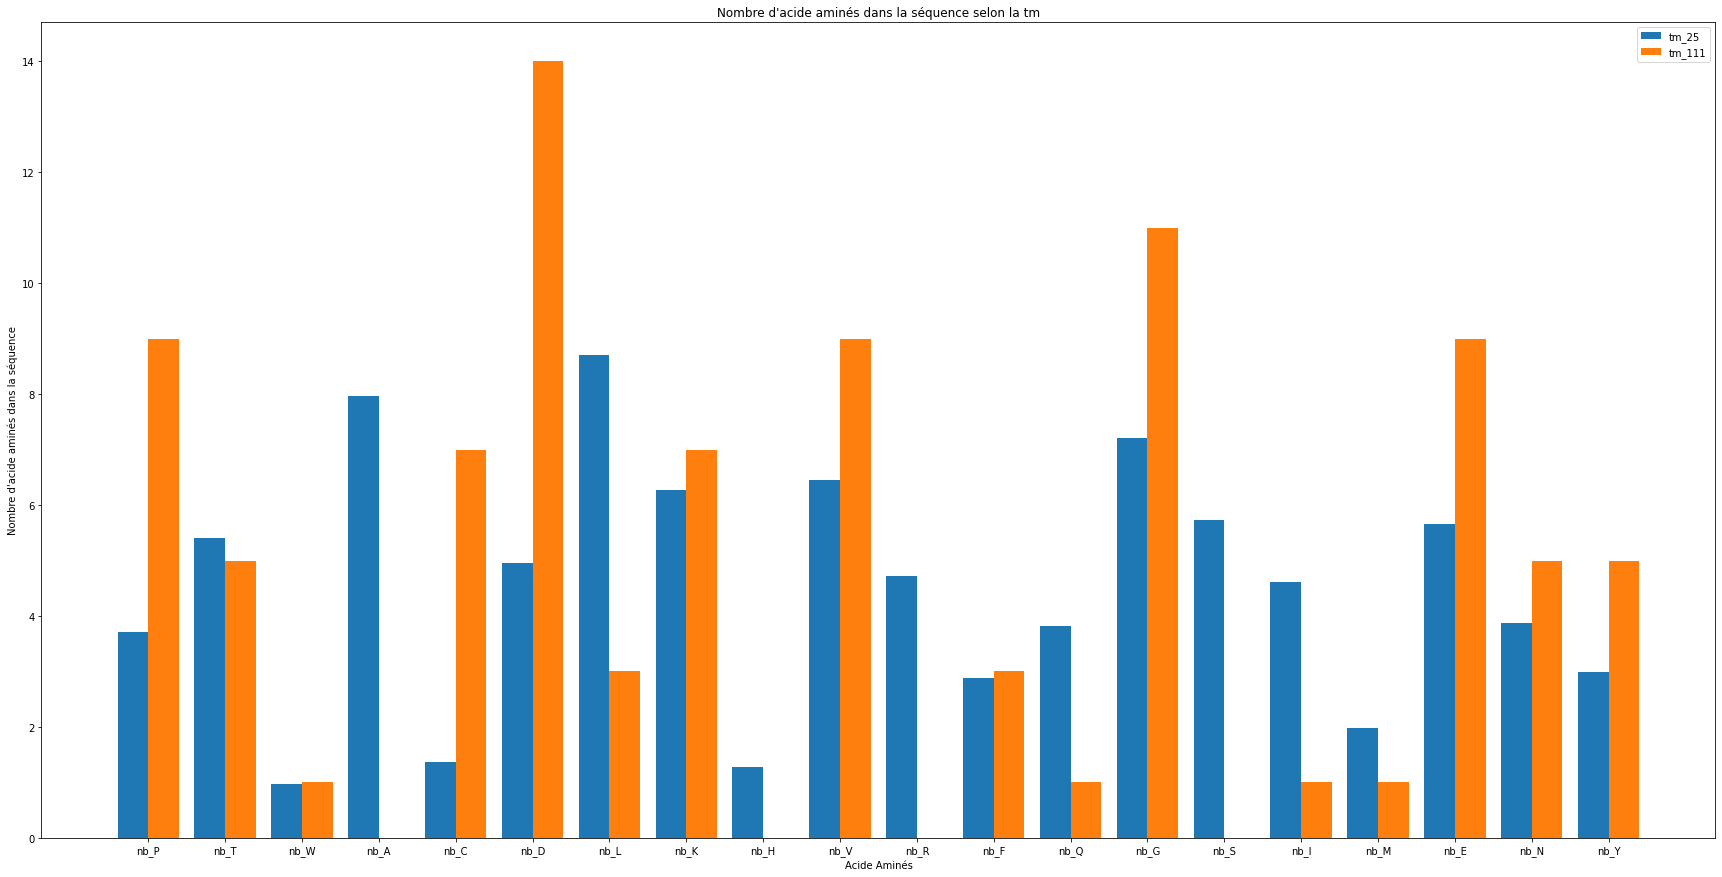

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(30,15)
letters = letters_tm['letters']
tm_25 = letters_tm['mean_25']
tm_111 = letters_tm['mean_max']
X_axis = np.arange(len(letters))
  
plt.bar(X_axis - 0.2, tm_25, 0.4, label = 'tm_25')
plt.bar(X_axis + 0.2, tm_111, 0.4, label = 'tm_111')
  
plt.xticks(X_axis, letters)
plt.xlabel("Acide Aminés")
plt.ylabel("Nombre d'acide aminés dans la séquence")
plt.title("Nombre d'acide aminés dans la séquence selon la tm")
plt.legend()
plt.show()

On voit ainsi, que pour certains acide aminés, on a tendance, à voir une augmentation du pourcentage de la présence de ces derniers, pour les séquences avec une tm importante. Notamment l’Acide Aspartique (D), la Proline (P), la Cystéine (C) ou encore la Gmycine (G). Cependant, à l’inverse, certains acides aminés disparaissent, telle que l’Histidine (H), l’Alanine (A), l’Arginine (R) et la Sérine (S). Certains acides aminés jouent alors peut être un rôle dans les résultats que nous obtiendront. Mais avant cela, observons les corrélations entre nos variables numériques.

## Corrélation entre nos features quantitatives

<AxesSubplot:>

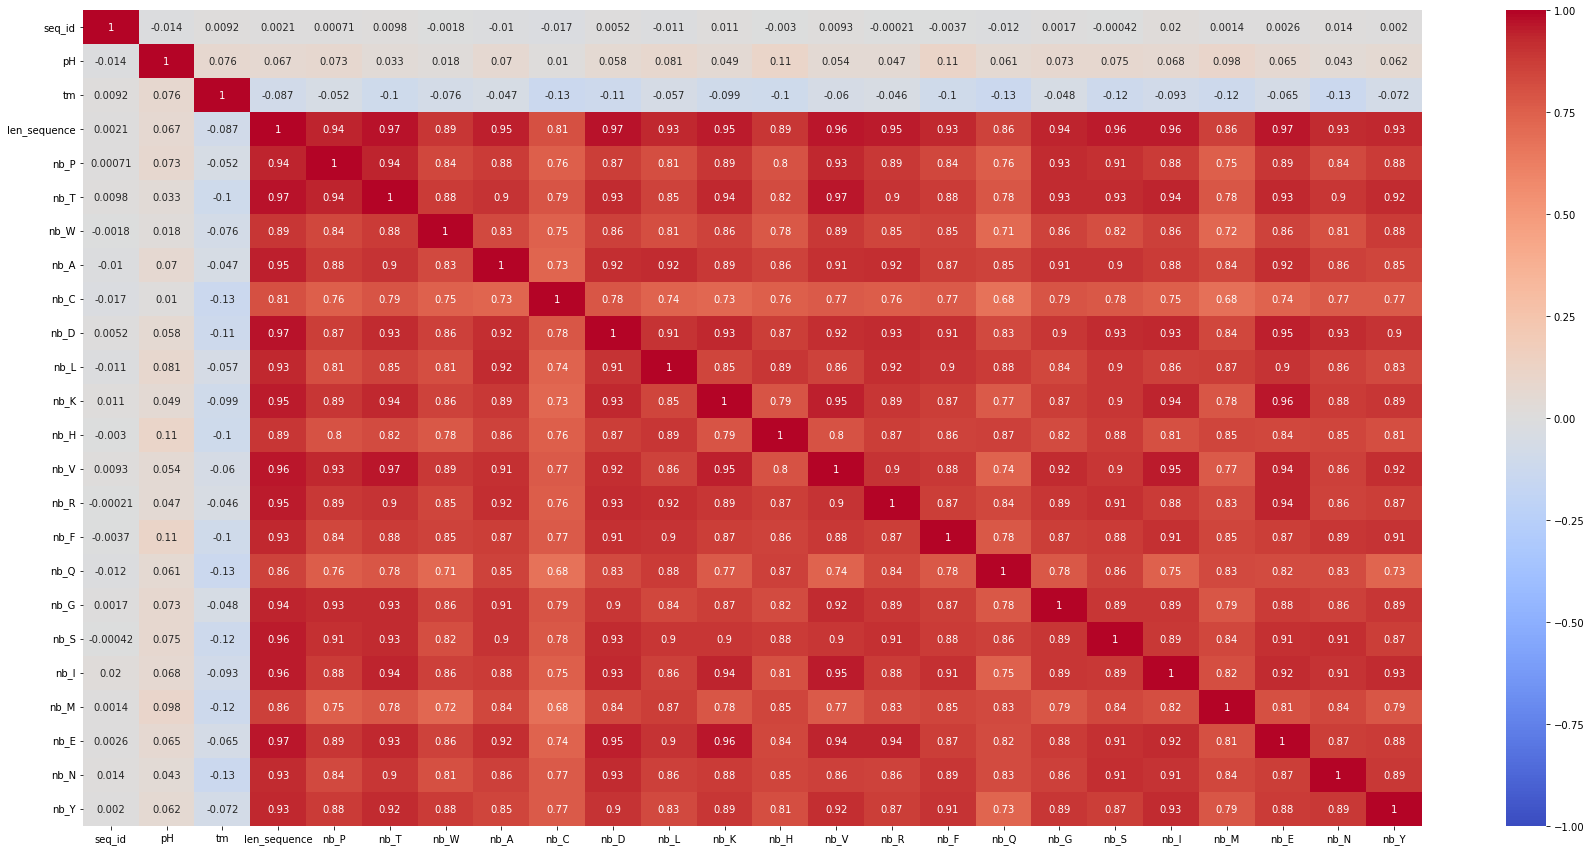

In [39]:
import seaborn as sns
sns.heatmap(train_enz.corr(), vmin = -1, vmax = +1, cmap='coolwarm', annot=True)

On voit ici, que les features liées à la longeur de la séquence et aux nombres des différents acides aminés, sont très corrélées entre elles. Les corrélations avec les différentes features et pH/tm sont plus faible, En effet, pour la tm nous avons une corrélation maximale de -0.13, obtenu avec les acides aminés Asparagine (N), Glutamine (Q) et Cystéine (C). Pour le Ph nous avons une corrélation maximale de 0.11 avec l’Histidine (H). Nous pouvons dire ici au vu des corrélations entre la tm et les autres features que nous éviterons le dataleakage.

# Préparation de notre jeu de données pour la modélisation 

In [40]:
train_enz_num=train_enz.drop(axis=1, columns=['seq_id','protein_sequence','tm'])
Cible=train_enz['tm']

In [41]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
train_enz_num_std = pd.DataFrame(Scaler.fit_transform(train_enz_num), columns=train_enz_num.columns)

## Observation de notre cible 

C:\Users\leper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tm', ylabel='Density'>

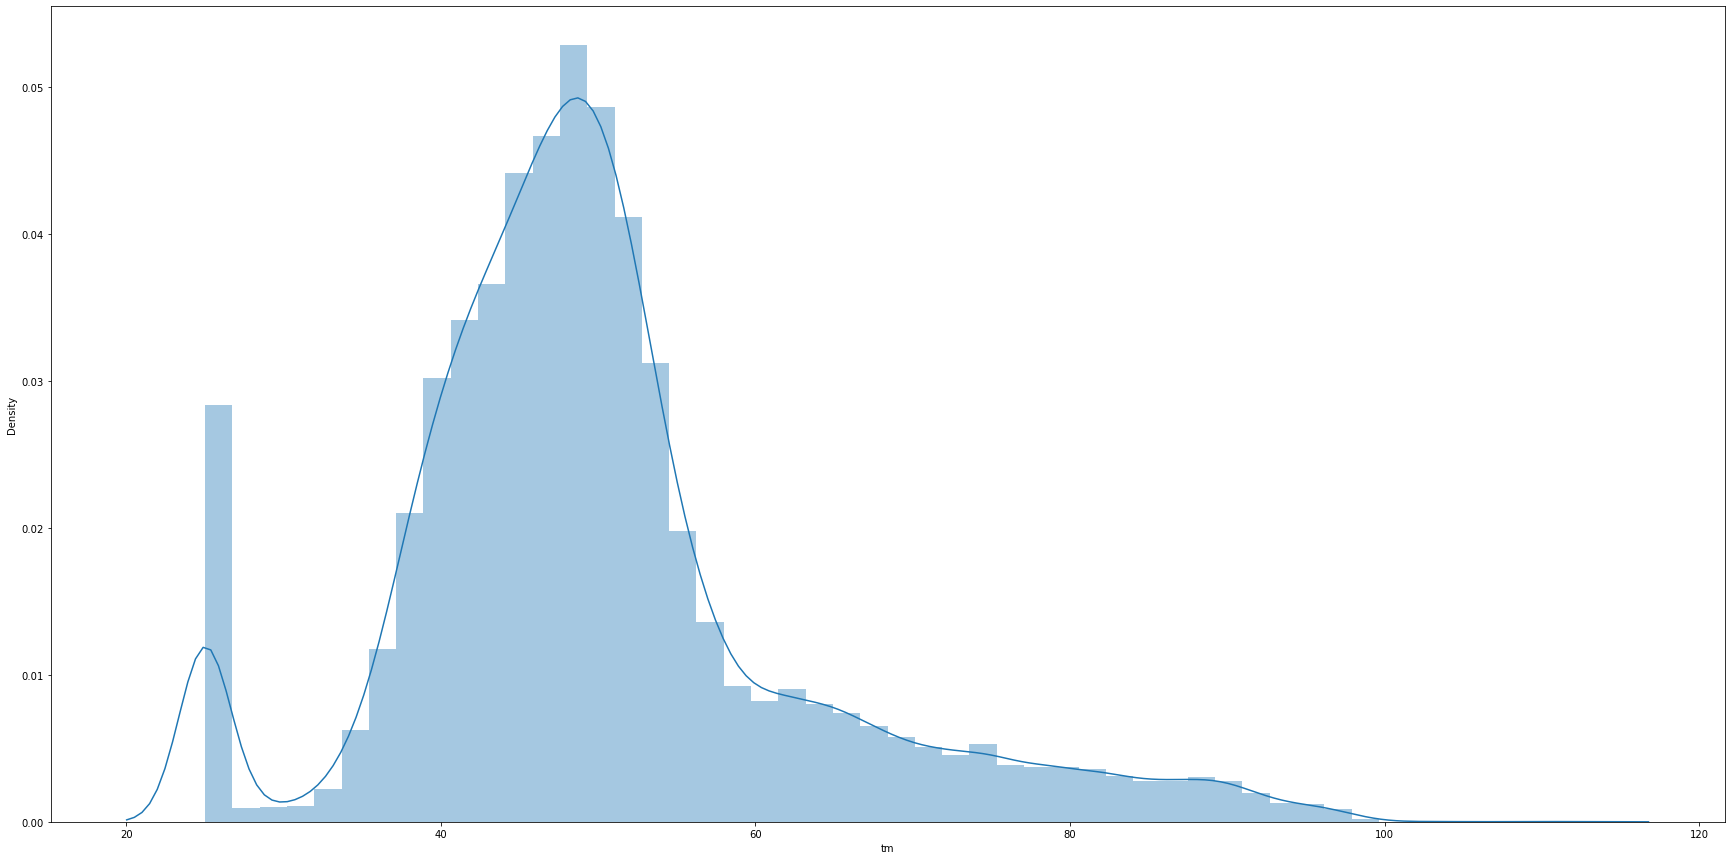

In [42]:
import seaborn as sns
sns.distplot(Cible)

In [43]:
from scipy.stats import skew

for i in range(0,10):
    Cible_log=np.log(Cible+i)
    asym=skew(Cible_log)
    if abs(asym) <0.05 :
        print(i,':',asym)

5 : -0.034193391265031306
6 : -0.013800799335588981
7 : 0.005704253914512849
8 : 0.024382143713338227
9 : 0.04228765525340486


C:\Users\leper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tm', ylabel='Density'>

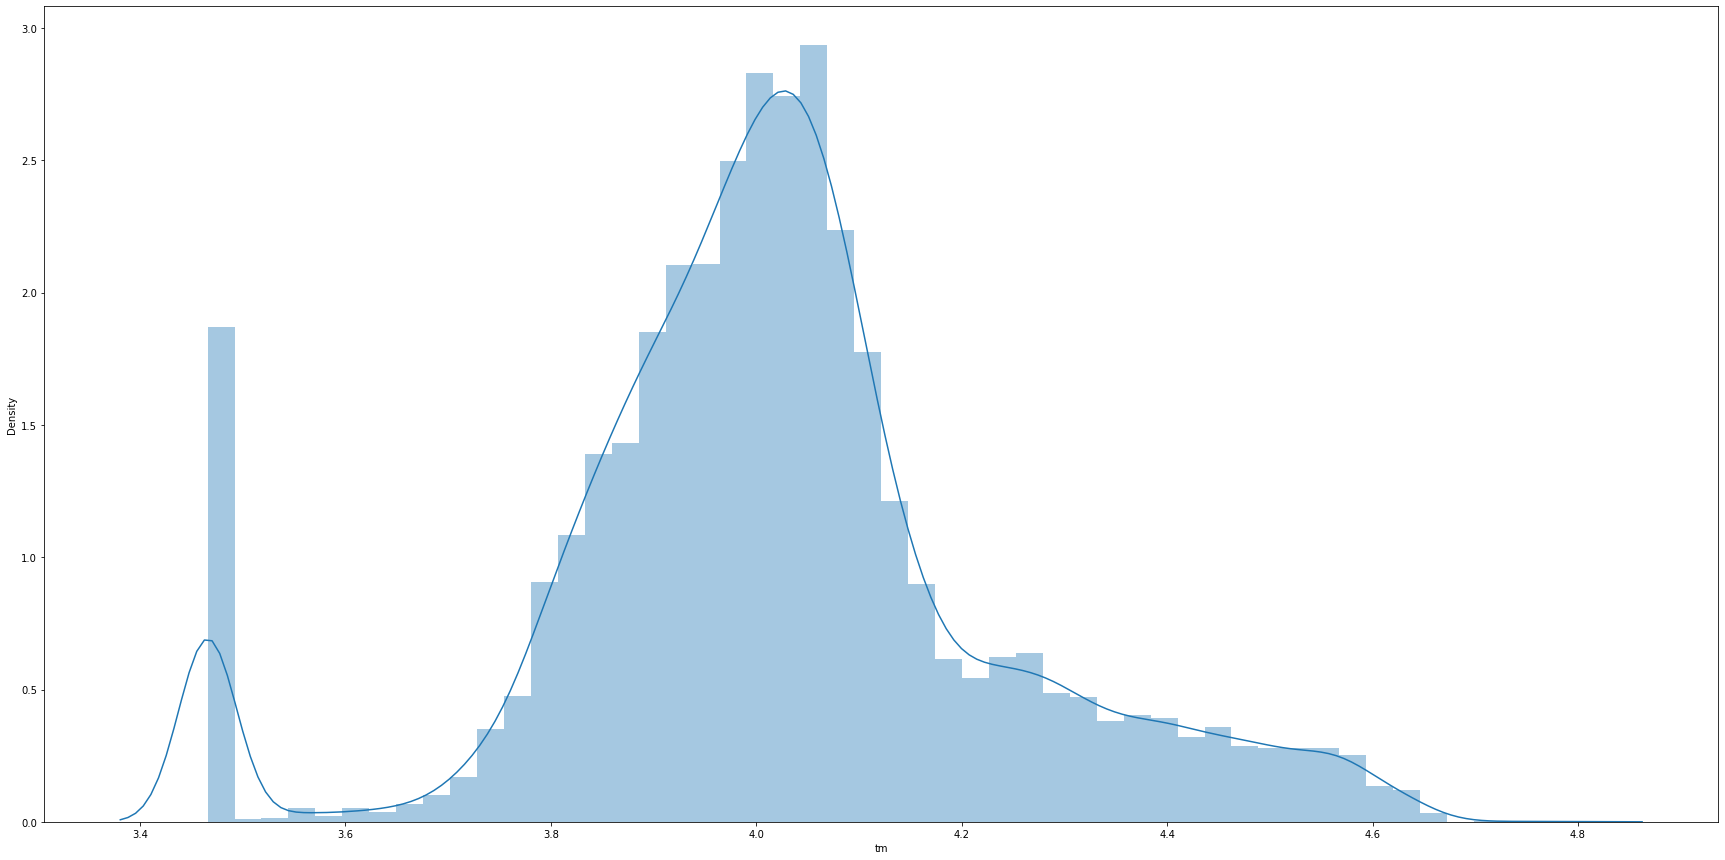

In [44]:
Cible_log=np.log(Cible+7)
sns.distplot(Cible_log)

On voit ici, que les données sont plus centrées que précédemment, nous continuerons donc avec ce df comme cible.

## Séparation de notre train set en train et test

In [45]:
from sklearn.model_selection import train_test_split
xtrain_log, xtest_log, ytrain_log, ytest_log = train_test_split(train_enz_num_std, Cible_log, train_size=0.8, random_state = 21)
xtrain, xtest, ytrain, ytest = train_test_split(train_enz_num_std, Cible, train_size=0.8, random_state = 21)

# Test d'un premier algorithme avec les paramètres par défaut

## Dummy Regressor

### Avec notre cible loguée

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.dummy import DummyRegressor

Dummy=DummyRegressor()
modele=Dummy.fit(xtrain_log,ytrain_log)
ypredict_log=modele.predict(xtest_log)

# Description R carré
print("R-squared:", np.round(r2_score(ytest_log, ypredict_log),3))
# mesure des erreurs entre des observations appariées exprimant le même phénomène
print("MAE:", np.round(mean_absolute_error(ytest_log, ypredict_log),3))
# mesure caractérisant la « précision » de cet estimateur
print("MSE:", np.round(mean_squared_error(ytest_log, ypredict_log),3))
# Mesure qui nous indique l'écart moyen entre les valeurs prédites et les valeurs observées dans un modèle
print('RMSE:', np.round(sqrt(mean_squared_error(ytest_log, ypredict_log)),3))

R-squared: -0.0
MAE: 0.161
MSE: 0.05
RMSE: 0.224


Text(0.5, 1.0, 'Tm - Prediction vs Test')

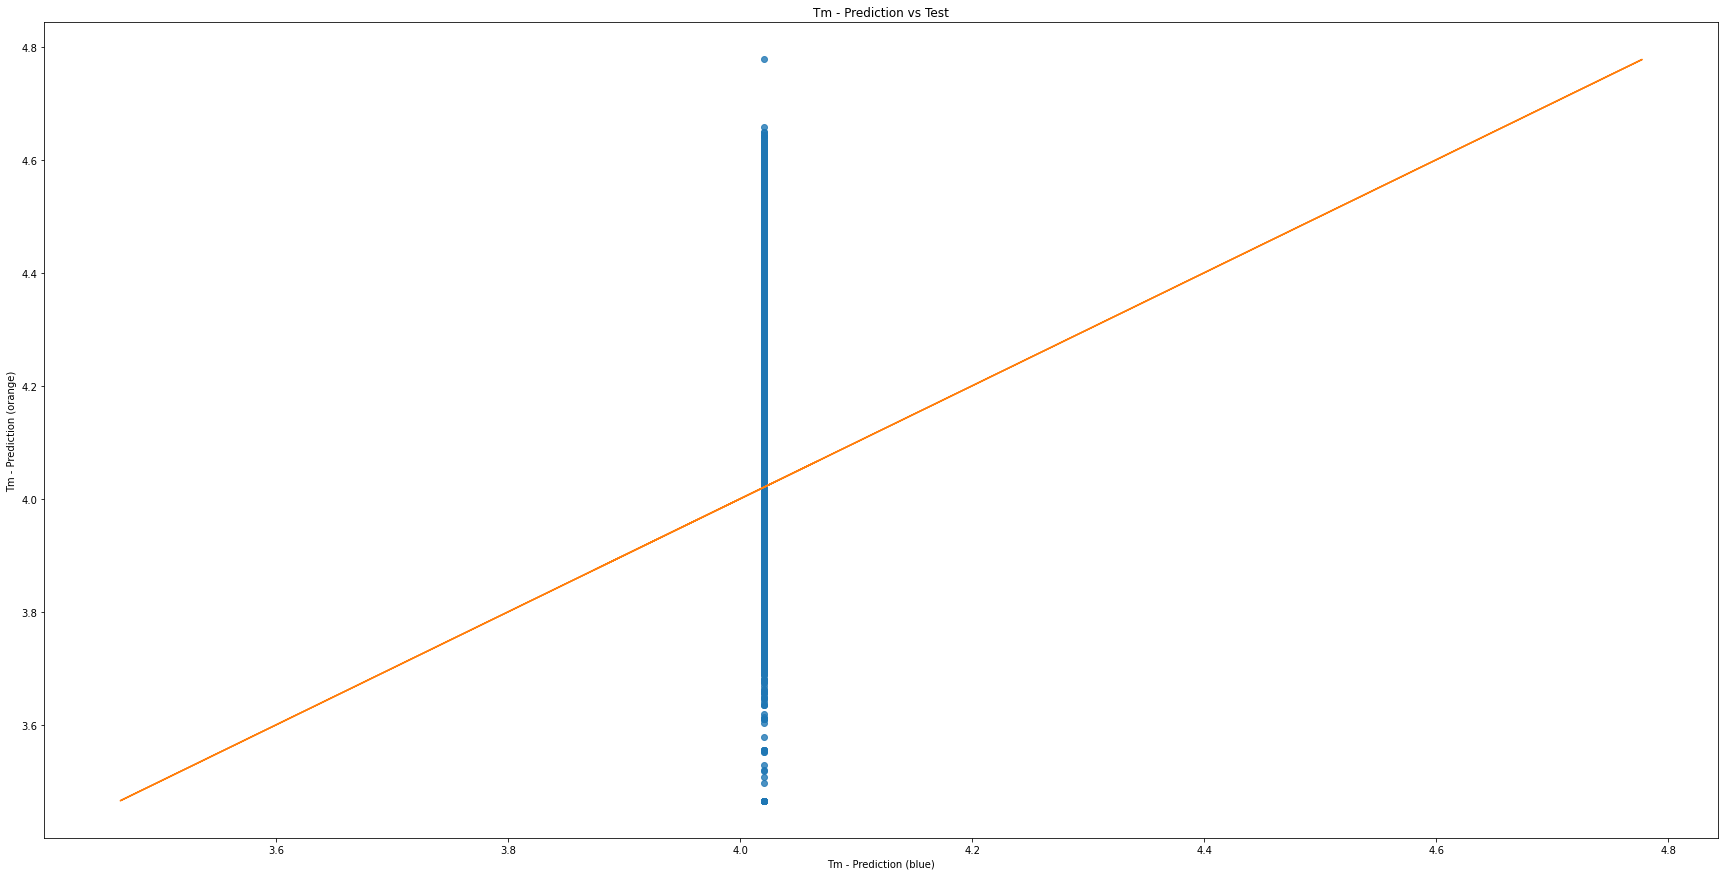

In [47]:
import matplotlib.pyplot as plt
# Pour avoir une visualisation de l'ajustement du modèle et de la prédiction en fonction des valeurs de test
sns.regplot(x=ypredict_log,y=ytest_log)
# Pour avoir la ligne des données des valeurs de test à comparer
plt.plot(ytest_log,ytest_log)
plt.xlabel("Tm - Prediction (blue)")
plt.ylabel("Tm - Prediction (orange)")
plt.title('Tm - Prediction vs Test')

Text(0.5, 1.0, 'Distribution des résidus selon la Tm')

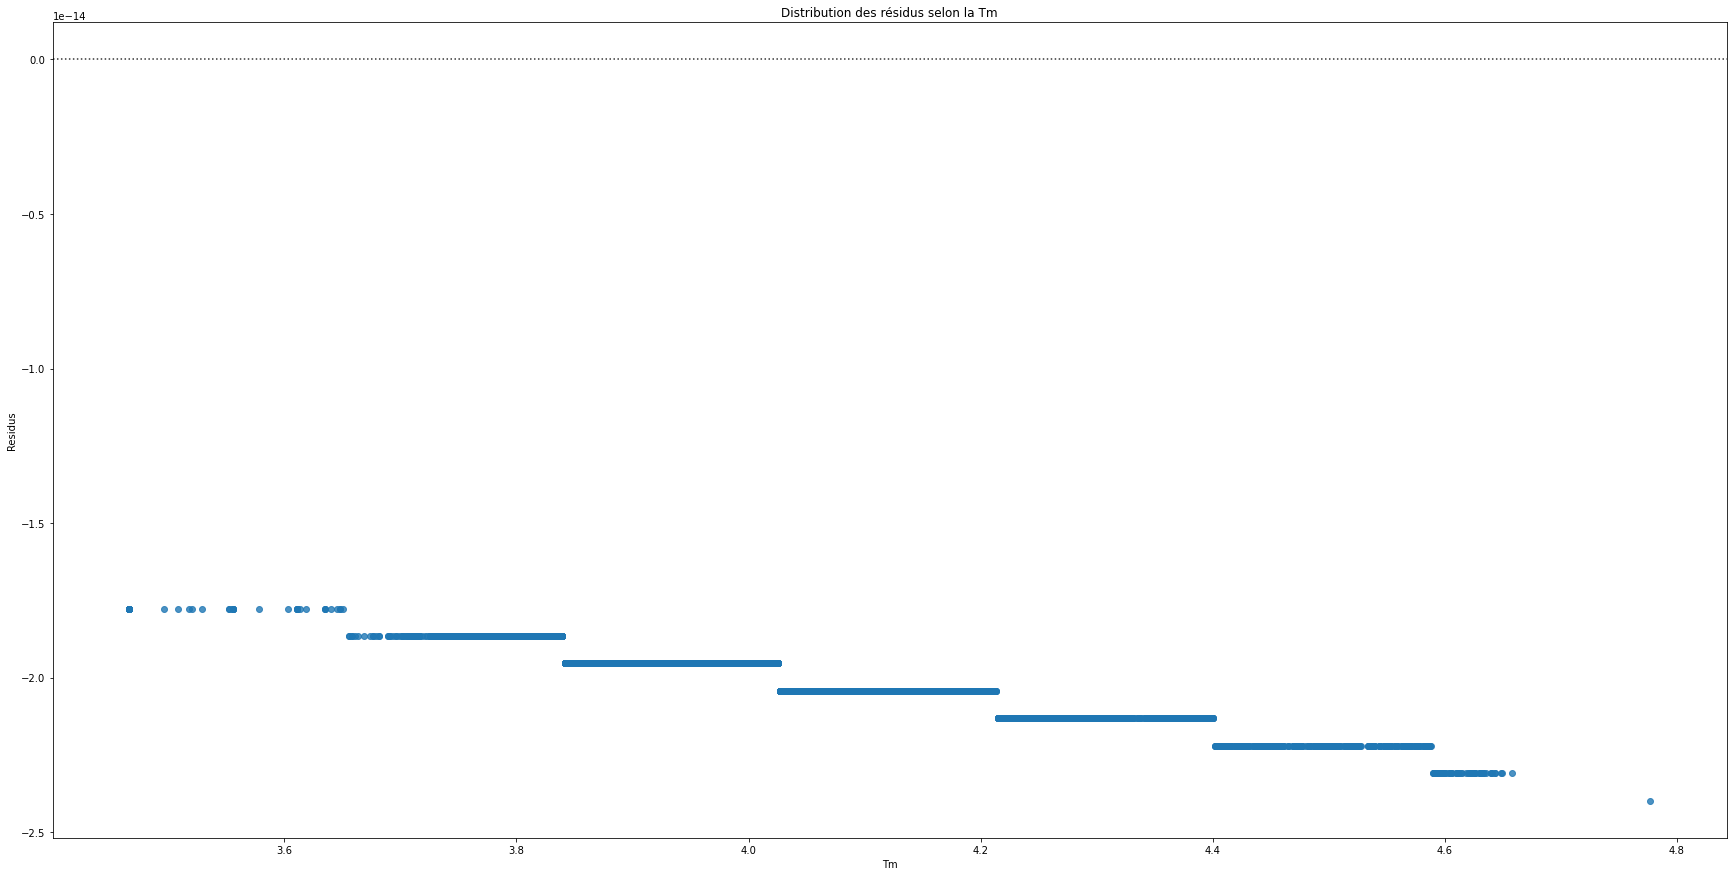

In [48]:
# Graphique de répartition des résidus
sns.residplot(x=ytest_log,y=ypredict_log)
plt.xlabel("Tm")
plt.ylabel("Residus")
plt.title('Distribution des résidus selon la Tm')

### Avec notre cible non loguée

In [49]:
modele=Dummy.fit(xtrain,ytrain)
ypredict=modele.predict(xtest)

# Description R carré
print("R-squared:", np.round(r2_score(ytest, ypredict),3))
# mesure des erreurs entre des observations appariées exprimant le même phénomène
print("MAE:", np.round(mean_absolute_error(ytest, ypredict),3))
# mesure caractérisant la « précision » de cet estimateur
print("MSE:", np.round(mean_squared_error(ytest, ypredict),3))
# Mesure qui nous indique l'écart moyen entre les valeurs prédites et les valeurs observées dans un modèle
print('RMSE:', np.round(sqrt(mean_squared_error(ytest, ypredict)),3))

R-squared: -0.0
MAE: 9.291
MSE: 172.177
RMSE: 13.122


Text(0.5, 1.0, 'Tm - Prediction vs Test')

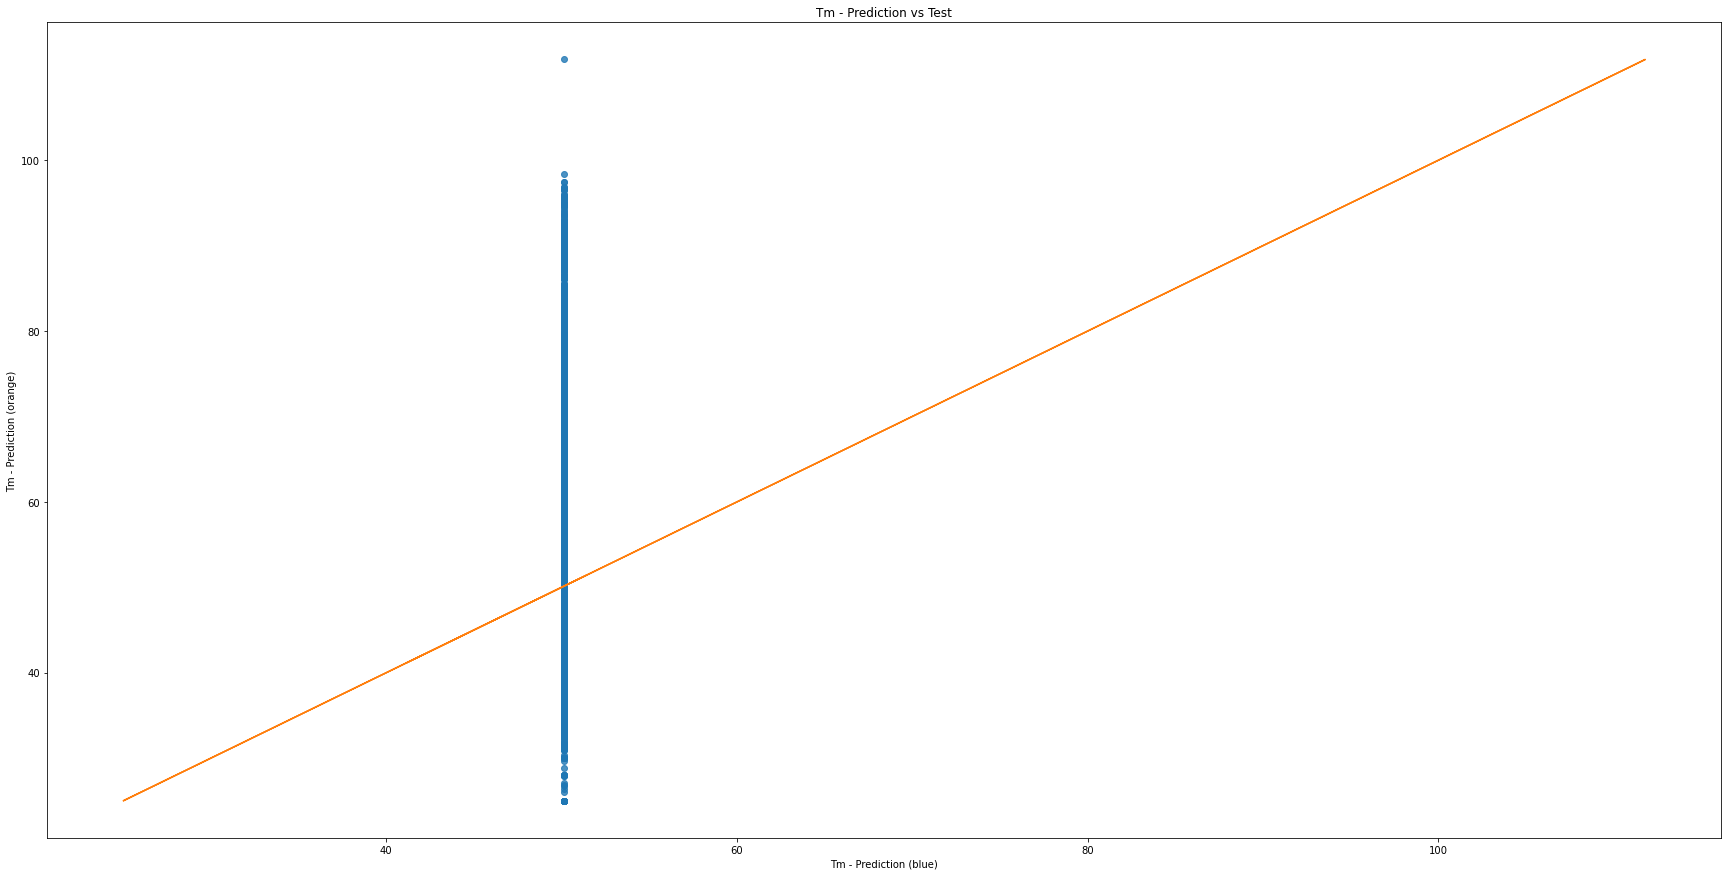

In [50]:
# Pour avoir une visualisation de l'ajustement du modèle et de la prédiction en fonction des valeurs de test
sns.regplot(x=ypredict,y=ytest)
# Pour avoir la ligne des données des valeurs de test à comparer
plt.plot(ytest,ytest)
plt.xlabel("Tm - Prediction (blue)")
plt.ylabel("Tm - Prediction (orange)")
plt.title('Tm - Prediction vs Test')

Text(0.5, 1.0, 'Distribution des résidus selon la Tm')

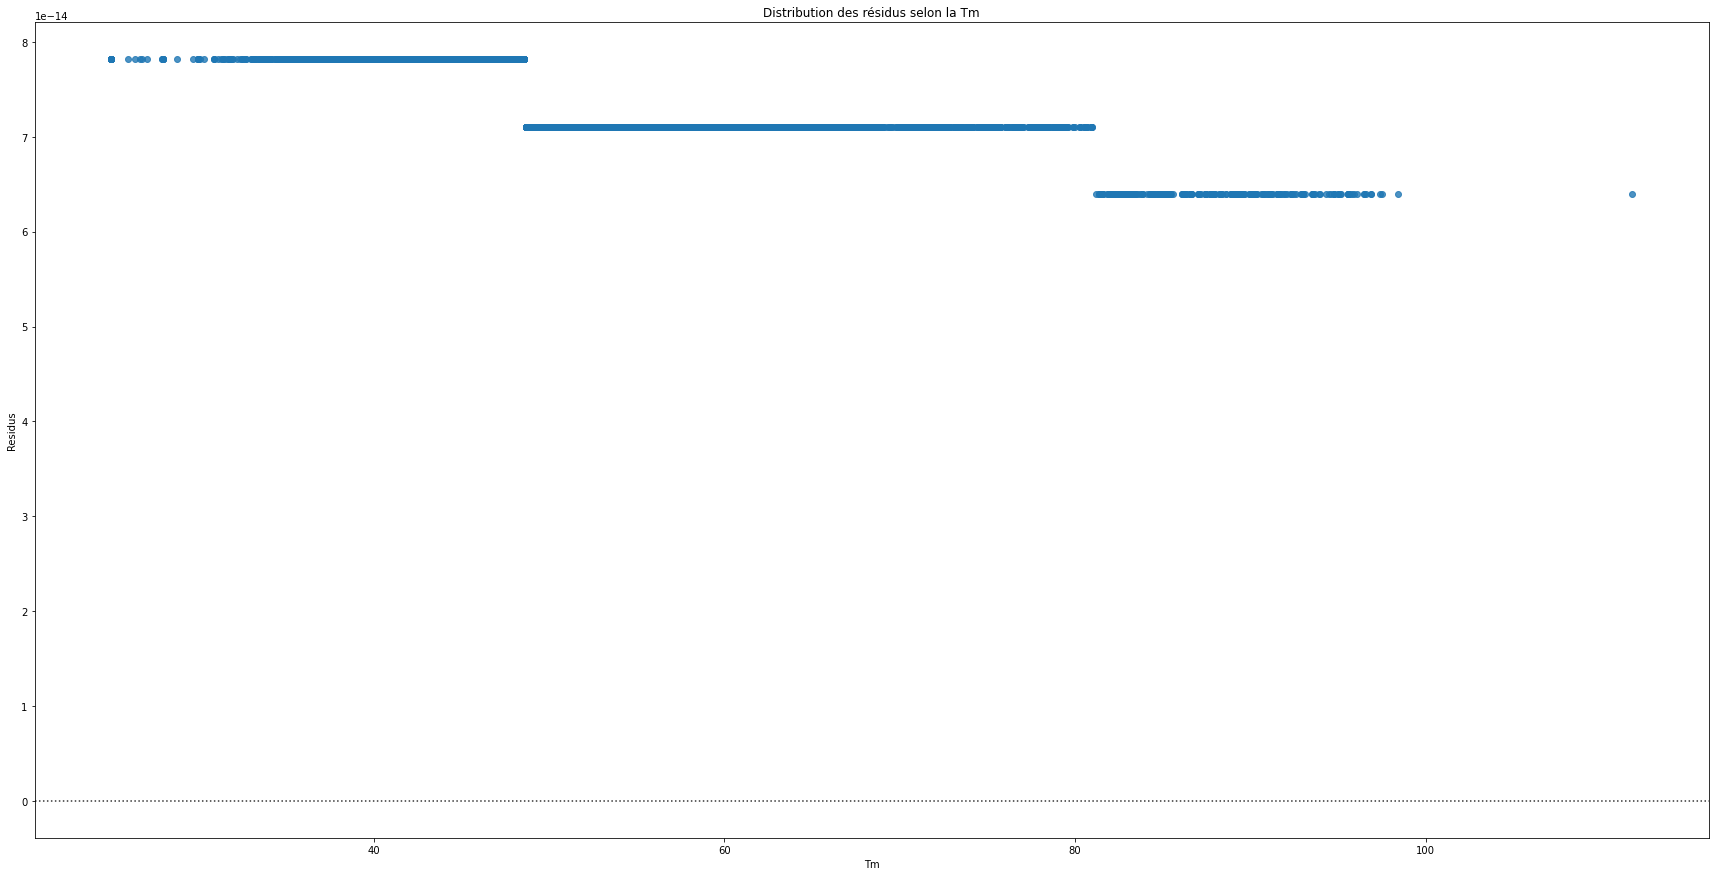

In [51]:
# Graphique de répartition des résidus
sns.residplot(x=ytest,y=ypredict)
plt.xlabel("Tm")
plt.ylabel("Residus")
plt.title('Distribution des résidus selon la Tm')

Même si ce modèle sert de base, il ne nous permet pas de voir l'impact de manière visuelle d'une transformation logarithmique sur notre jeu de données. Cependant au niveau des scores, nous voyons que les données loguées donnent de meilleurs résultats. Afin d'observer cela de manière visuelle, nous allons faire la même chose sur le modèle SVR.

## SVR

### Avec notre cible loguées

In [52]:
from sklearn.svm import SVR
Svr = SVR()
modele=Svr.fit(xtrain_log, ytrain_log)
ypredict_log = modele.predict(xtest_log)

In [53]:
# Description R carré
print("R-squared:", np.round(r2_score(ytest_log, ypredict_log),3))
# mesure des erreurs entre des observations appariées exprimant le même phénomène
print("MAE:", np.round(mean_absolute_error(ytest_log, ypredict_log),3))
# mesure caractérisant la « précision » de cet estimateur
print("MSE:", np.round(mean_squared_error(ytest_log, ypredict_log),3))
# Mesure qui nous indique l'écart moyen entre les valeurs prédites et les valeurs observées dans un modèle
print('RMSE:', np.round(sqrt(mean_squared_error(ytest_log, ypredict_log)),3))

R-squared: 0.309
MAE: 0.134
MSE: 0.035
RMSE: 0.187


Text(0.5, 1.0, 'Tm - Prediction vs Test')

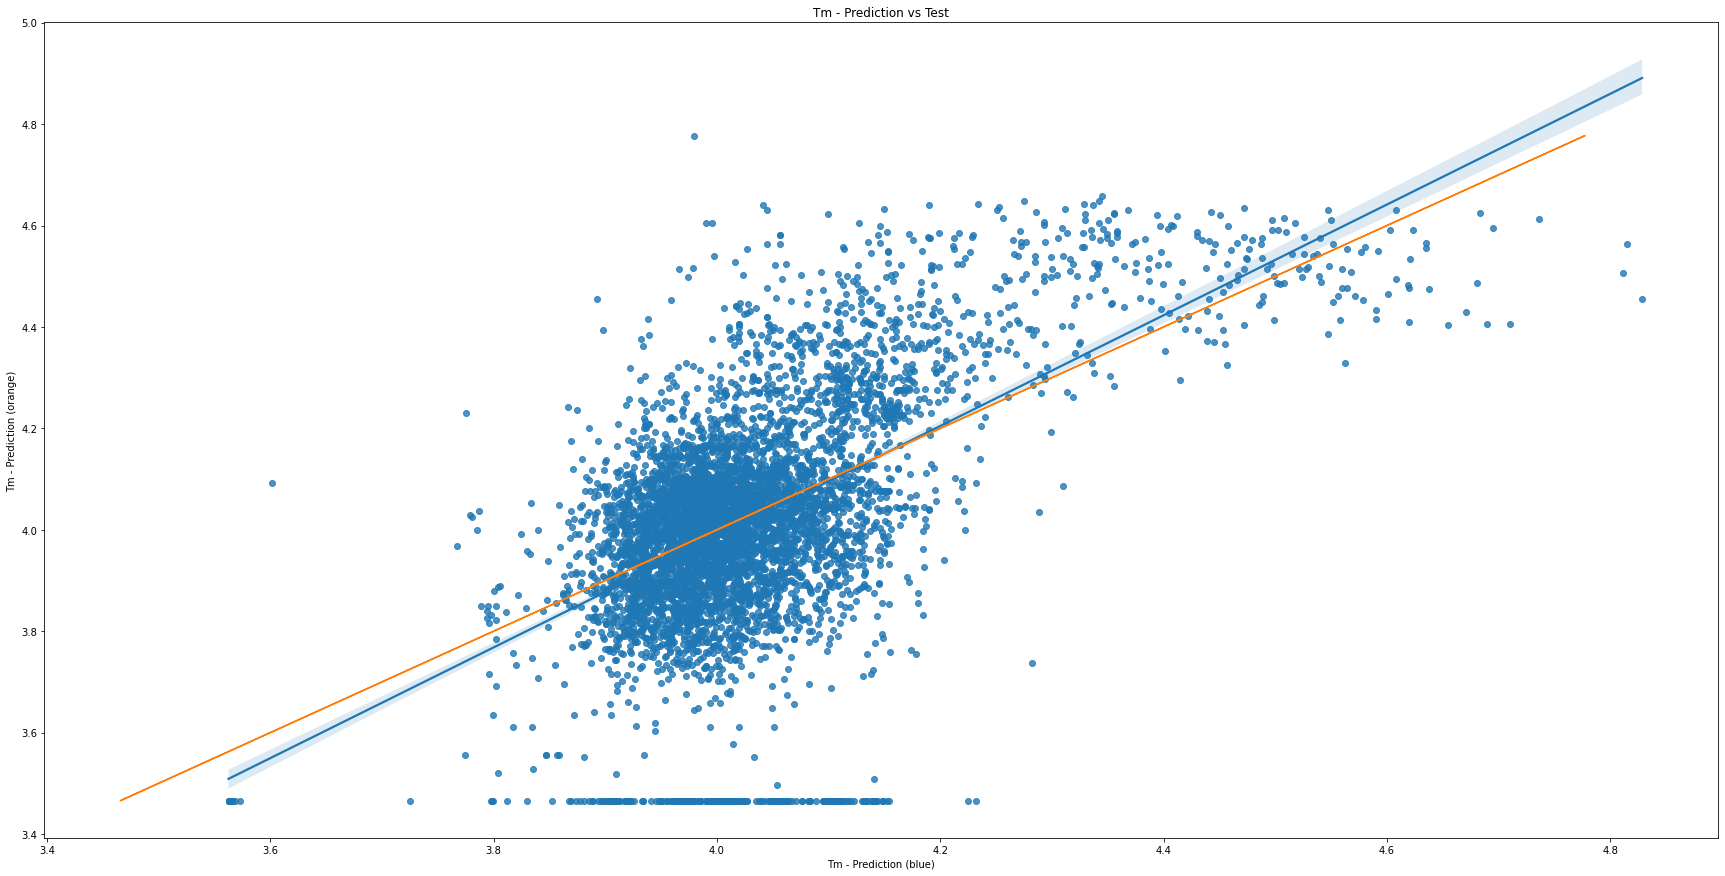

In [54]:
# Pour avoir une visualisation de l'ajustement du modèle et de la prédiction en fonction des valeurs de test
sns.regplot(x=ypredict_log,y=ytest_log)
# Pour avoir la ligne des données des valeurs de test à comparer
plt.plot(ytest_log,ytest_log)
plt.xlabel("Tm - Prediction (blue)")
plt.ylabel("Tm - Prediction (orange)")
plt.title('Tm - Prediction vs Test')

Text(0.5, 1.0, 'Distribution des résidus selon le Tm')

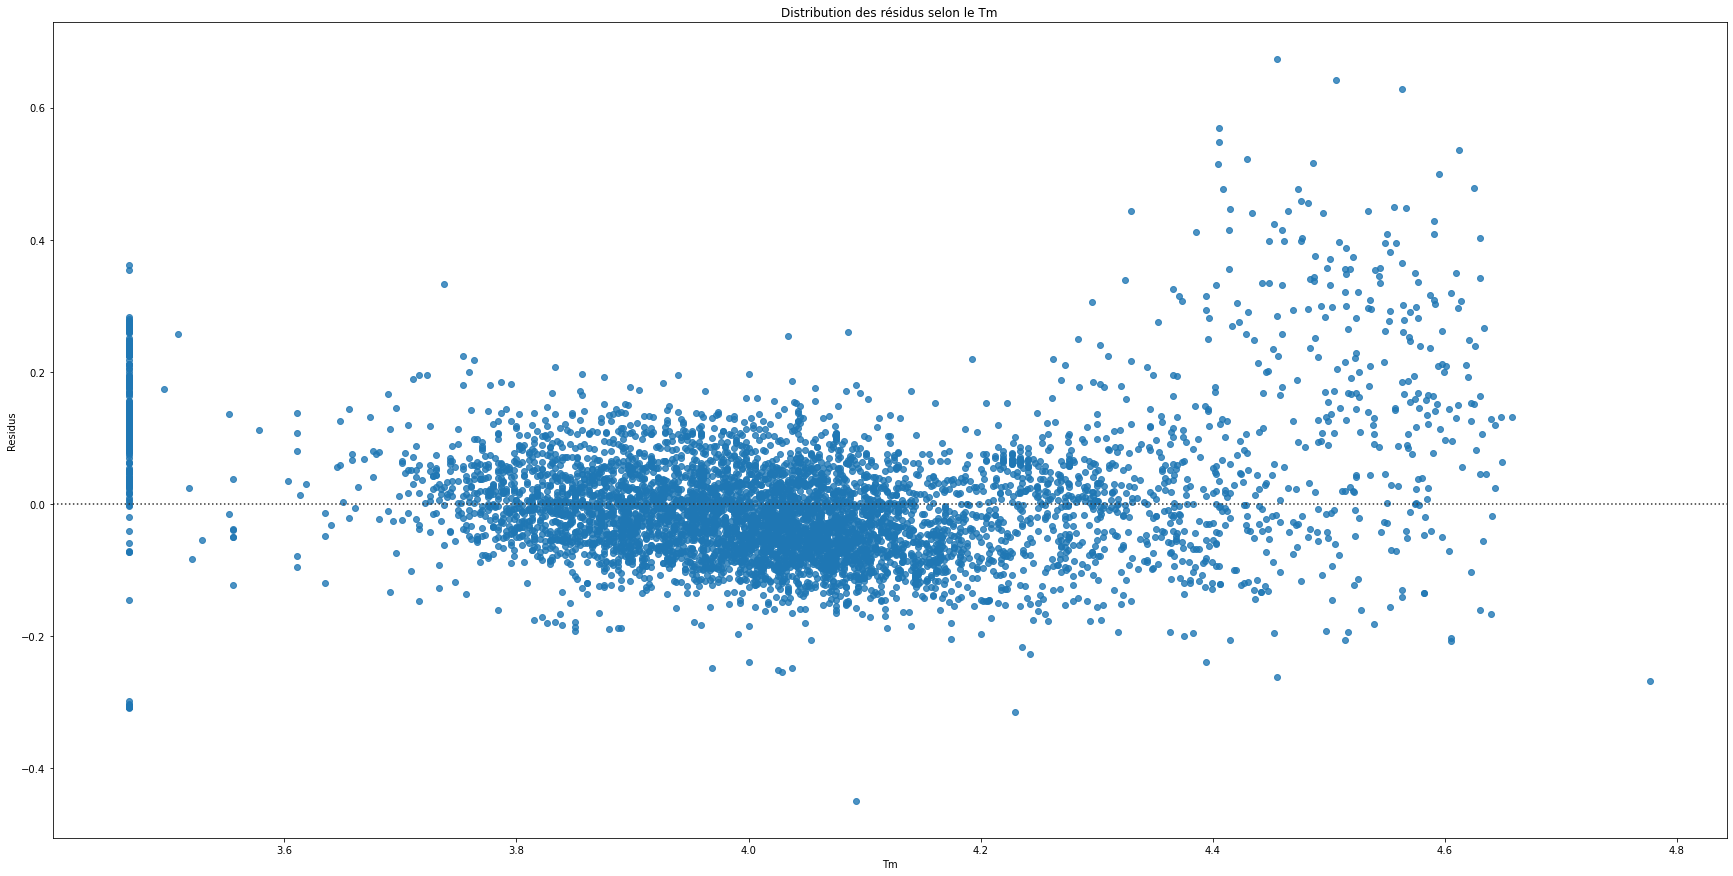

In [55]:
# Graphique de répartition des résidus
sns.residplot(x=ytest_log,y=ypredict_log)
plt.xlabel("Tm")
plt.ylabel("Residus")
plt.title('Distribution des résidus selon le Tm')

### Avec notre cible non loguée

In [57]:
modele=Svr.fit(xtrain, ytrain)
ypredict = modele.predict(xtest)

In [58]:
# Description R carré
print("R-squared:", np.round(r2_score(ytest, ypredict),3))
# mesure des erreurs entre des observations appariées exprimant le même phénomène
print("MAE:", np.round(mean_absolute_error(ytest, ypredict),3))
# mesure caractérisant la « précision » de cet estimateur
print("MSE:", np.round(mean_squared_error(ytest, ypredict),3))
# Mesure qui nous indique l'écart moyen entre les valeurs prédites et les valeurs observées dans un modèle
print('RMSE:', np.round(sqrt(mean_squared_error(ytest, ypredict)),3))

R-squared: 0.214
MAE: 8.319
MSE: 135.337
RMSE: 11.633


Text(0.5, 1.0, 'Tm - Prediction vs Test')

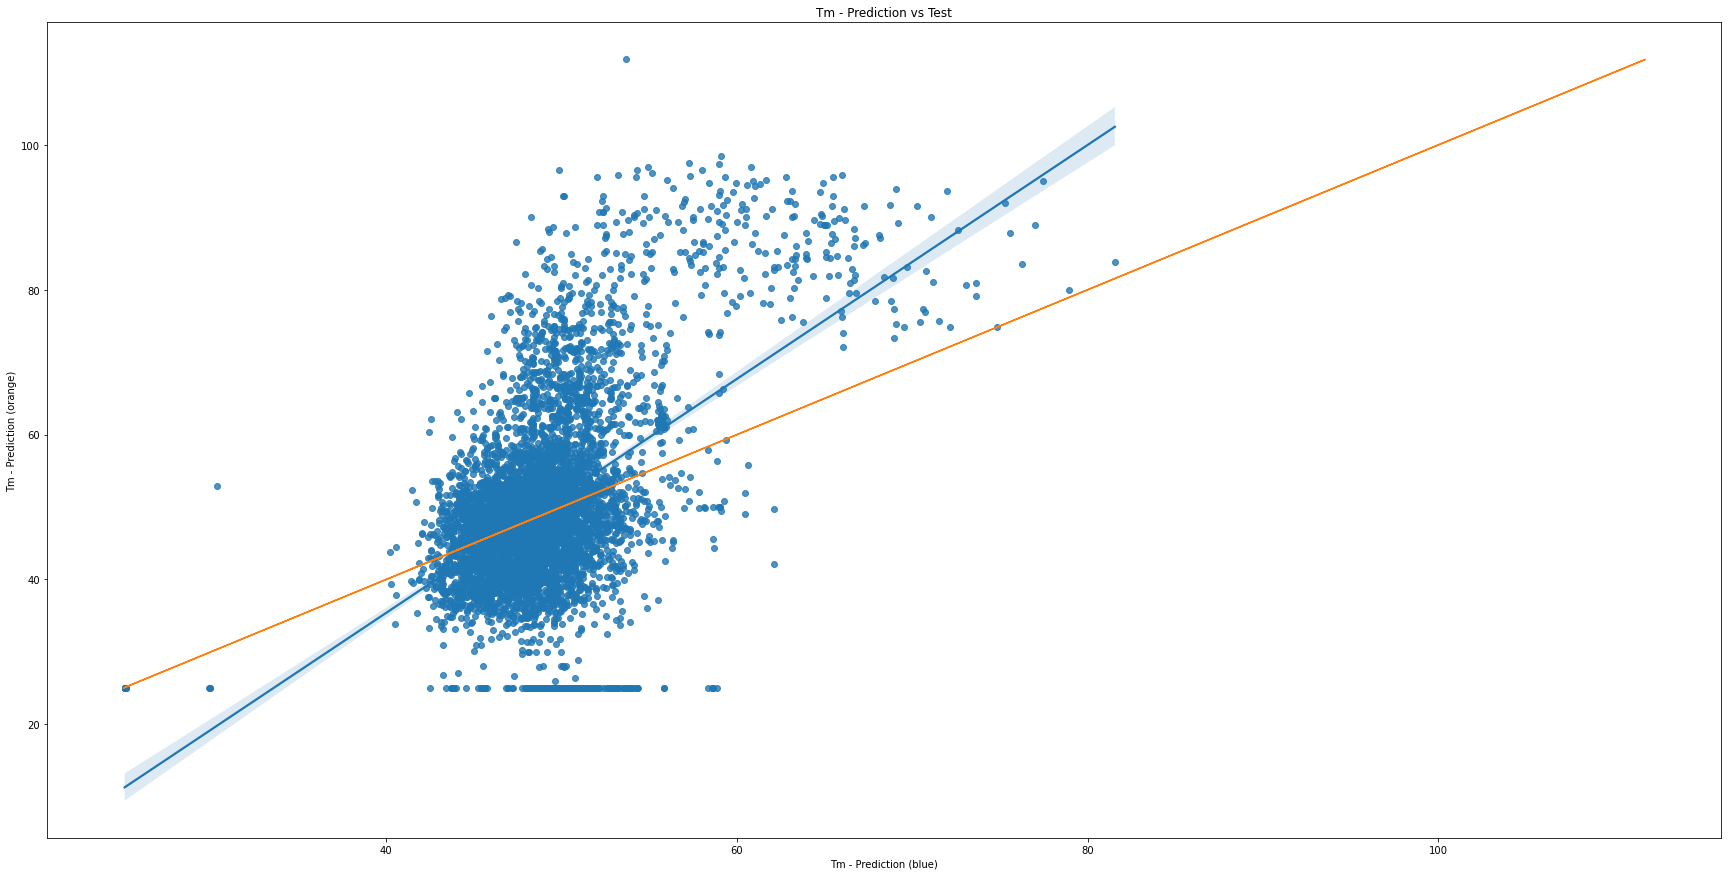

In [59]:
# Pour avoir une visualisation de l'ajustement du modèle et de la prédiction en fonction des valeurs de test
sns.regplot(x=ypredict,y=ytest)
# Pour avoir la ligne des données des valeurs de test à comparer
plt.plot(ytest,ytest)
plt.xlabel("Tm - Prediction (blue)")
plt.ylabel("Tm - Prediction (orange)")
plt.title('Tm - Prediction vs Test')

Text(0.5, 1.0, 'Distribution des résidus selon le Tm')

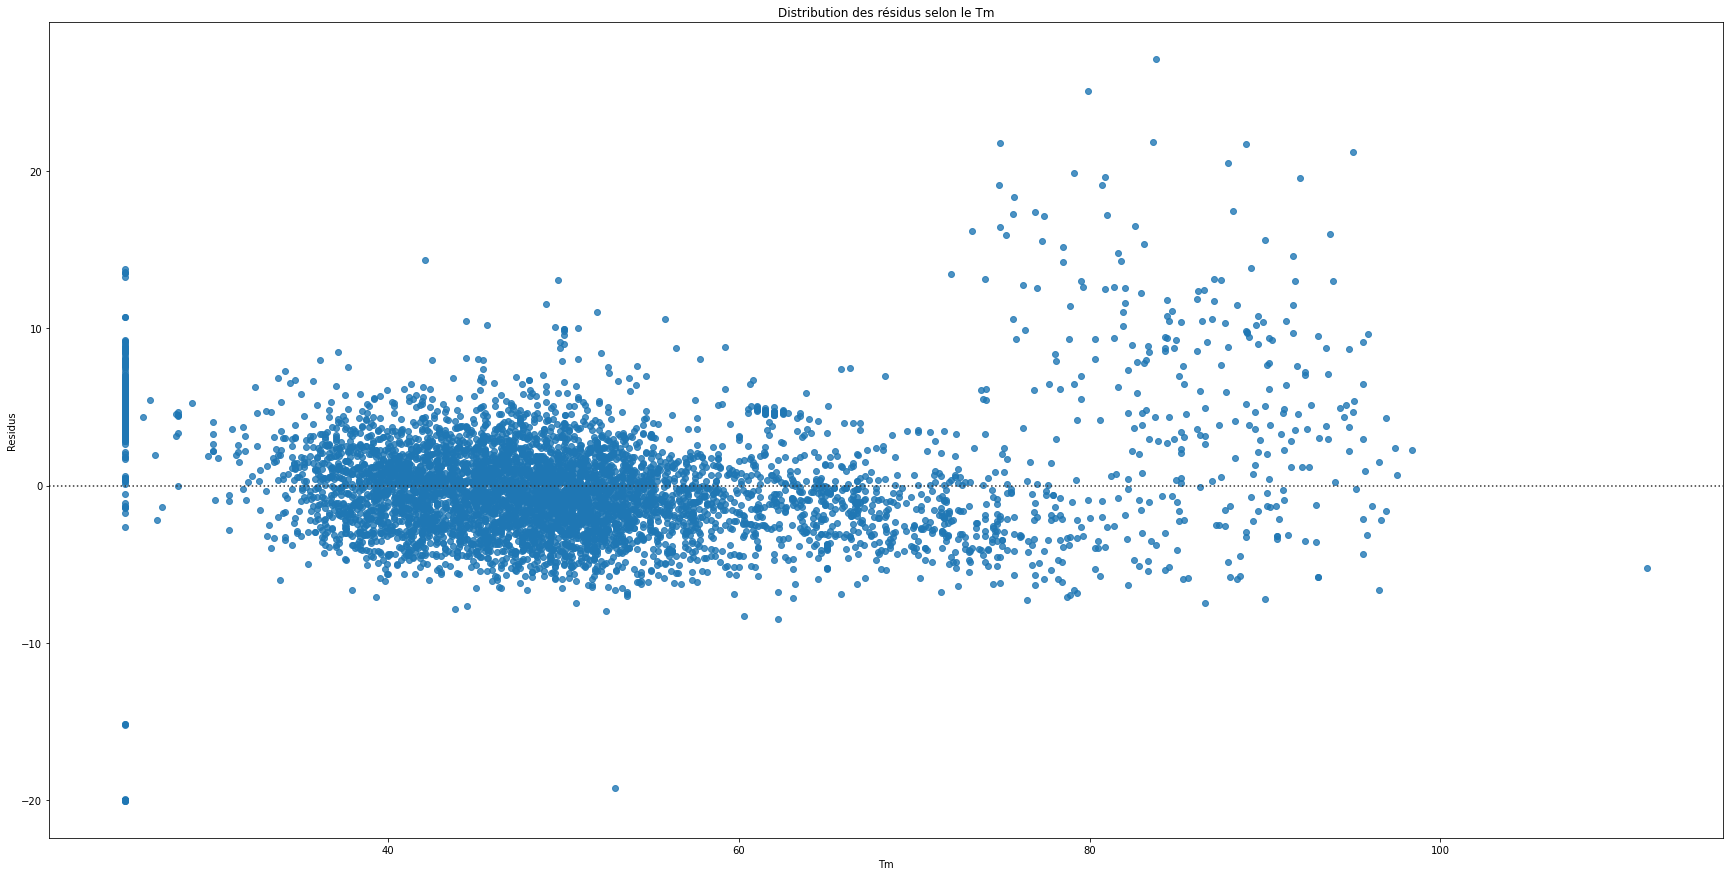

In [60]:
# Graphique de répartition des résidus
sns.residplot(x=ytest,y=ypredict)
plt.xlabel("Tm")
plt.ylabel("Residus")
plt.title('Distribution des résidus selon le Tm')

On voit ainsi, que l'utilisation de la transformation logarithmique, nous donne de meilleur résultats visuel et mathématiques. Nous allons donc continuer avec notre cible loguée afin de maximiser les résultats sur notre jeu de données.

# Validation croisée

## Listing des différents modèles

Dummy Regressor https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

<br>Linear Regressor https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

<br>K neighbors Regressor https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

<br>Ridge Regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

<br>Lasso Regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lassodocumentation

<br>Elastic net https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

<br>SVR https://scikit-learn.org/stable/modules/svm.html#svm-regression

<br>Random Forest Regressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

<br>Gradient Boosting Regressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

In [61]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

Linear = LinearRegression(n_jobs=1)
Lasso = linear_model.Lasso(random_state=21)
Ridge = Ridge(random_state=21)
Gradient_Boosting_Regressor=GradientBoostingRegressor(random_state=21)
Random_Forest_Regressor=RandomForestRegressor(random_state=21)
Elastic=ElasticNet(random_state=21)
KNNR=KNeighborsRegressor(n_jobs=1)


list_model=[Dummy, Linear, KNNR, Ridge, Lasso, Elastic, Svr, Random_Forest_Regressor, Gradient_Boosting_Regressor]

## Mise en place de k-folds

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [63]:
cv = KFold(n_splits=5)

## Création de Dataframes

### Création d'un dataframe qui va stocker les résultats moyen de la cross validation des différents modèles

In [64]:
Cross_validation=pd.DataFrame(columns=['Modèle','R²_train','R²_test','MAE_train','MAE_test','MSE_train','MSE_test','RMSE_train','RMSE_test'])

In [65]:
Cross_validation['Modèle']=list_model

In [66]:
Cross_validation

,Modèle,R²_train,R²_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,DummyRegressor(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LinearRegression(n_jobs=1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KNeighborsRegressor(n_jobs=1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ridge(random_state=21),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lasso(random_state=21),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ElasticNet(random_state=21),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SVR(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,RandomForestRegressor(random_state=21),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GradientBoostingRegressor(random_state=21),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Création de Dataframes qui vont stocker les valeurs des différents folds de nos différents modèles

In [67]:
vs_R2=pd.DataFrame(columns=['Folds'])
vs_MAE=pd.DataFrame(columns=['Folds'])
vs_MSE=pd.DataFrame(columns=['Folds'])
vs_RMSE=pd.DataFrame(columns=['Folds'])

In [68]:
vs_R2['Folds']=['R2_Fold1','R2_Fold2','R2_Fold3','R2_Fold4','R2_Fold5']
vs_MAE['Folds']=['MAE_Fold1','MAE_Fold2','MAE_Fold3','MAE_Fold4','MAE_Fold5']
vs_MSE['Folds']=['MSE_Fold1','MSE_Fold2','MSE_Fold3','MSE_Fold4','MSE_Fold5']
vs_RMSE['Folds']=['RMSE_Fold1','RMSE_Fold2','RMSE_Fold3','RMSE_Fold4','RMSE_Fold5']

In [69]:
for i in list_model:
    modele =i
    r2=np.round(cross_val_score(modele, xtrain_log, ytrain_log, scoring = 'r2', cv=cv),4)
    mae=-np.round(cross_val_score(modele, xtrain_log, ytrain_log, scoring = 'neg_mean_absolute_error', cv=cv),4)
    mse=-np.round(cross_val_score(modele, xtrain_log, ytrain_log, scoring = 'neg_mean_squared_error', cv=cv),4)
    rmse=-np.round(cross_val_score(modele, xtrain_log, ytrain_log, scoring = 'neg_root_mean_squared_error', cv=cv),4)
    vs_R2[i]=r2
    vs_MAE[i]=mae
    vs_MSE[i]=mse
    vs_RMSE[i]=rmse

In [70]:
vs_R2

,Folds,DummyRegressor(),LinearRegression(n_jobs=1),KNeighborsRegressor(n_jobs=1),Ridge(random_state=21),Lasso(random_state=21),ElasticNet(random_state=21),SVR(),RandomForestRegressor(random_state=21),GradientBoostingRegressor(random_state=21)
0,R2_Fold1,-0.0005,0.0880,0.4361,0.0879,-0.0005,-0.0005,0.2951,0.4980,0.3630
1,R2_Fold2,-0.0000,0.0879,0.4665,0.0879,-0.0000,-0.0000,0.3218,0.4983,0.3835
2,R2_Fold3,-0.0000,0.1033,0.4598,0.1033,-0.0000,-0.0000,0.3681,0.5125,0.4167
3,R2_Fold4,-0.0005,0.1062,0.4966,0.1062,-0.0005,-0.0005,0.3164,0.5203,0.3927
4,R2_Fold5,-0.0000,0.0872,0.4845,0.0872,-0.0000,-0.0000,0.3031,0.5117,0.3924


### Mise en place de la ligne de la moyenne dans les dataframes des différents test

In [71]:
vs_R2.at[5,'Folds']='Average'
list_R2=[]
for i in vs_R2.columns[1:]:
    vs_R2.at[5,i]=vs_R2[i].mean()
    list_R2.append(vs_R2.at[5,i])
    
vs_MAE.at[5,'Folds']='Average'
list_MAE=[]
for i in vs_MAE.columns[1:]:
    vs_MAE.at[5,i]=vs_MAE[i].mean()
    list_MAE.append(vs_MAE.at[5,i])
    
vs_MSE.at[5,'Folds']='Average'
list_MSE=[]
for i in vs_MSE.columns[1:]:
    vs_MSE.at[5,i]=vs_MSE[i].mean()
    list_MSE.append(vs_MSE.at[5,i])
    
vs_RMSE.at[5,'Folds']='Average'
list_RMSE=[]
for i in vs_RMSE.columns[1:]:
    vs_RMSE.at[5,i]=vs_RMSE[i].mean()
    list_RMSE.append(vs_RMSE.at[5,i])

In [72]:
vs_R2

,Folds,DummyRegressor(),LinearRegression(n_jobs=1),KNeighborsRegressor(n_jobs=1),Ridge(random_state=21),Lasso(random_state=21),ElasticNet(random_state=21),SVR(),RandomForestRegressor(random_state=21),GradientBoostingRegressor(random_state=21)
0,R2_Fold1,-0.0005,0.08800,0.4361,0.0879,-0.0005,-0.0005,0.2951,0.49800,0.36300
1,R2_Fold2,-0.0000,0.08790,0.4665,0.0879,-0.0000,-0.0000,0.3218,0.49830,0.38350
2,R2_Fold3,-0.0000,0.10330,0.4598,0.1033,-0.0000,-0.0000,0.3681,0.51250,0.41670
3,R2_Fold4,-0.0005,0.10620,0.4966,0.1062,-0.0005,-0.0005,0.3164,0.52030,0.39270
4,R2_Fold5,-0.0000,0.08720,0.4845,0.0872,-0.0000,-0.0000,0.3031,0.51170,0.39240
5,Average,-0.0002,0.09452,0.4687,0.0945,-0.0002,-0.0002,0.3209,0.50816,0.38966


### Remplissage de notre DataFrame de Cross Validation 

In [73]:
Cross_validation['R²_train']=list_R2
Cross_validation['MAE_train']=list_MAE
Cross_validation['MSE_train']=list_MSE
Cross_validation['RMSE_train']=list_RMSE

In [74]:
Cross_validation

,Modèle,R²_train,R²_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,DummyRegressor(),-0.00020,NaN,0.15874,NaN,0.04952,NaN,0.22252,NaN
1,LinearRegression(n_jobs=1),0.09452,NaN,0.15586,NaN,0.04484,NaN,0.21174,NaN
2,KNeighborsRegressor(n_jobs=1),0.46870,NaN,0.11368,NaN,0.02632,NaN,0.16216,NaN
3,Ridge(random_state=21),0.09450,NaN,0.15584,NaN,0.04484,NaN,0.21174,NaN
4,Lasso(random_state=21),-0.00020,NaN,0.15874,NaN,0.04952,NaN,0.22252,NaN
5,ElasticNet(random_state=21),-0.00020,NaN,0.15874,NaN,0.04952,NaN,0.22252,NaN
6,SVR(),0.32090,NaN,0.13222,NaN,0.03358,NaN,0.18330,NaN
7,RandomForestRegressor(random_state=21),0.50816,NaN,0.10810,NaN,0.02436,NaN,0.15606,NaN
8,GradientBoostingRegressor(random_state=21),0.38966,NaN,0.13060,NaN,0.03024,NaN,0.17380,NaN


In [75]:
list_R2_test=[]
list_MAE_test=[]
list_MSE_test=[]
list_RMSE_test=[]
for i in list_model:
    modele = i.fit(xtrain_log, ytrain_log)
    ypredict_log = modele.predict(xtest_log)
    R2_test=np.round(r2_score(ytest_log, ypredict_log),3)
    MAE_test=np.round(mean_absolute_error(ytest_log, ypredict_log),3)
    MSE_test=np.round(mean_squared_error(ytest_log, ypredict_log),3)
    RMSE_test=np.round(sqrt(mean_squared_error(ytest_log, ypredict_log)),3)
    list_R2_test.append(R2_test)
    list_MAE_test.append(MAE_test)
    list_MSE_test.append(MSE_test)
    list_RMSE_test.append(RMSE_test)

Cross_validation['R²_test']=list_R2_test
Cross_validation['MAE_test']=list_MAE_test
Cross_validation['MSE_test']=list_MSE_test
Cross_validation['RMSE_test']=list_RMSE_test

In [76]:
Cross_validation

,Modèle,R²_train,R²_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,DummyRegressor(),-0.00020,-0.000,0.15874,0.161,0.04952,0.050,0.22252,0.224
1,LinearRegression(n_jobs=1),0.09452,0.103,0.15586,0.157,0.04484,0.045,0.21174,0.213
2,KNeighborsRegressor(n_jobs=1),0.46870,0.462,0.11368,0.115,0.02632,0.027,0.16216,0.165
3,Ridge(random_state=21),0.09450,0.103,0.15584,0.157,0.04484,0.045,0.21174,0.213
4,Lasso(random_state=21),-0.00020,-0.000,0.15874,0.161,0.04952,0.050,0.22252,0.224
5,ElasticNet(random_state=21),-0.00020,-0.000,0.15874,0.161,0.04952,0.050,0.22252,0.224
6,SVR(),0.32090,0.309,0.13222,0.134,0.03358,0.035,0.18330,0.187
7,"(DecisionTreeRegressor(max_features=1.0, rando...",0.50816,0.490,0.10810,0.111,0.02436,0.026,0.15606,0.160
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.38966,0.383,0.13060,0.133,0.03024,0.031,0.17380,0.176


In [77]:
pip install pandas

# Mise en place de la validation croisée avec influence d'hyperparamètre

## Création des bases de données de stockages d'informations

In [78]:
import pandas as pd
GridSearch=pd.DataFrame(columns=['Modèle','Type','R²','MAE','MSE','RMSE','Temps'])
GridSearch

,Modèle,Type,R²,MAE,MSE,RMSE,Temps


## Linear Regression

### Observation des paramètres

In [79]:
from sklearn.linear_model import LinearRegression
print('Pour le model linéaire les paramètres sont les suivants :')
Linear.get_params()

Pour le model linéaire les paramètres sont les suivants :


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': 'deprecated',
 'positive': False}

#### La prédiction par défaut

In [80]:
import time
def ajout_par_défaut(model,types,Xtrain,Ytrain,Xtest,Ytest,list_models,list_types,list_R2,list_MAE,list_MSE,list_RMSE,temps):

    debut = time.process_time()

    modele=model.fit(Xtrain, Ytrain)
    ypredict = modele.predict(Xtest)
    r2=np.round(r2_score(Ytest, ypredict),3)
    mae=np.round(mean_absolute_error(Ytest, ypredict),3)
    mse=np.round(mean_squared_error(Ytest, ypredict),3)
    rmse=np.round(sqrt(mean_squared_error(Ytest, ypredict)),3)

    list_models.append(model)
    list_types.append(types)
    list_R2.append(r2)
    list_MAE.append(mae)
    list_MSE.append(mse)
    list_RMSE.append(rmse)
    
    fin = time.process_time()
    tps=fin-debut
    temps.append(tps)

In [81]:
#Création des listes de stockages
models=[]
types=[]
list_R2=[]
list_MAE=[]
list_MSE=[]
list_RMSE=[]
list_ACC=[]
Temps=[]


In [82]:
ajout_par_défaut(Linear,'Par défaut',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

#### Prediction avec GridSearch cv

Nous allons d'abord chercher quels paramètres nous semblent les plus important pour cette modélisation.

    - copy_x, vaut True par défaut, et correspond au fait de faire une copie de notre data set x. Nous ne toucherons pas à ce paramètre.
    - Fit_intercept, vaut également True par Défaut, et correspond à la présence ou non d'une ordonnée à l'origine. 
    - Normalize, à par valeur par défaut False, et correspond au fait de normalisé le dataset X avant la regression par le modèle. Nous ne toucherons pas non plus à ce paramètre, les données étant déjà standardisées.
    - Positive, vaut False par défaut. Lorsque ce dernier est True, il force les coefficients à être positifs.
    
Nous jouerons donc sur fit intercept et positive comme paramètres.

In [ ]:
# Mise en place du dictionnaire des paramètres à tester
paramètre={'fit_intercept' :['True','False'],'positive' :['True','False']}

In [ ]:
from sklearn.model_selection import GridSearchCV
Linear_GS=GridSearchCV(estimator =Linear, param_grid=paramètre, cv=5, return_train_score=True)

In [ ]:
Linear_GS.fit(xtrain_log,ytrain_log)

In [213]:
pickle.dump(Linear_GS,open('Linear_GS','wb'))

In [83]:
Linear_GS =  pickle.load(open("Linear_GS", 'rb'))

C:\Users\leper\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\leper\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [84]:
pd.DataFrame(Linear_GS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015495,0.001124,0.004402,0.001244,True,True,"{'fit_intercept': 'True', 'positive': 'True'}",0.006482,0.006701,0.00624,0.009476,0.007927,0.007365,0.001205,1
1,0.014417,0.000434,0.003807,0.000464,True,False,"{'fit_intercept': 'True', 'positive': 'False'}",0.006482,0.006701,0.00624,0.009476,0.007927,0.007365,0.001205,1
2,0.014145,0.000466,0.003418,0.000054,False,True,"{'fit_intercept': 'False', 'positive': 'True'}",0.006482,0.006701,0.00624,0.009476,0.007927,0.007365,0.001205,1
3,0.015563,0.001897,0.006754,0.005897,False,False,"{'fit_intercept': 'False', 'positive': 'False'}",0.006482,0.006701,0.00624,0.009476,0.007927,0.007365,0.001205,1


In [85]:
Linear_GS.best_params_

{'fit_intercept': 'True', 'positive': 'True'}

In [86]:
ajout_par_défaut(LinearRegression(fit_intercept='True',positive='True'),'Grid Search',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

## Ridge

### Observation des paramètres

In [87]:
from sklearn.linear_model import Ridge
print('Pour le model Ridge les paramètres sont les suivants :')
Ridge().get_params()

Pour le model Ridge les paramètres sont les suivants :


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

#### La prédiction par défaut

In [88]:
ajout_par_défaut(Ridge(),'Par défaut',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

#### Prediction avec GridSearch cv

Nous allons d'abord chercher quels paramètres nous semblent les plus important pour cette modélisation.

    - Alpha vaut par défaut 1, c'est le paramètre qui controle la force de régularisation. Il peut varier entre 0 et l'infini, nous jouerons avec ce paramètre.
    - copy_x, vaut True par défaut, et correspond au fait de faire une copie de notre data set x. Nous ne toucherons pas à ce paramètre.
    - Fit_intercept, vaut également True par Défaut, et correspond à la présence ou non d'une ordonnée à l'origine. Dans notre cas, nous ne toucherons pas non plus à ce paramètre.
    - Max_iter, est équivalent à None par défaut, il correspond au nombre d'iteration et dépend du solveur.
    - Normalize, à par valeur par défaut False, et correspond au fait de normalisé le dataset X avant la regression par le modèle. Nous ne toucherons pas non plus à ce paramètre, les données étant déjà standardisées.
    - Positive, vaut False par défaut. Lorsque ce dernier est True, il force les coefficients à être positifs, nous ne toucherons pas non plus à ce paramètre.
    - Solver, vaut par défaut auto, ce qui correspond au fait que le solveur sera choisi automatiquement en fonction du type de données. Nous ne toucherons pas à ce paramètre non plus.
    - Tol, vaut 0.001 par défaut et correspond à la précision de la solution. Nous pourrons essayer de jouer avec ce dernier.
    
Nous jouerons donc sur les paramètres alpha et tol pour ce modèle.

In [ ]:
# Mise en place du dictionnaire des paramètres à tester
paramètre={'alpha' :[1,5,10,15,20],'tol' :[0.0001,0.001,0.01,0.1]}

In [ ]:
Ridge_GS=GridSearchCV(estimator =Ridge, param_grid=paramètre, cv=5)

In [ ]:
Ridge_GS.fit(xtrain_log,ytrain_log)

In [ ]:
pickle.dump(Ridge_GS,open('Ridge_GS','wb'))

In [89]:
Ridge_GS =  pickle.load(open("Ridge_GS", 'rb'))

C:\Users\leper\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator Ridge from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\leper\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [90]:
Ridge_GS.best_params_

{'alpha': 20, 'tol': 0.0001}

In [91]:
from sklearn.linear_model import Ridge
ajout_par_défaut(Ridge(alpha=20,tol=0.0001,random_state=21),'Grid Search',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

## KNNR : K neighbors regressor

### Observation des paramètres

In [92]:
print('Pour le model K neighbors Regressor les paramètres sont les suivants :')
KNNR.get_params()

Pour le model K neighbors Regressor les paramètres sont les suivants :


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [93]:
ajout_par_défaut(KNNR,'Par défaut',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

#### Prediction avec GridSearch cv

Nous allons d'abord chercher quels paramètres nous semblent les plus important pour cette modélisation.

    - Algorithm prend par défaut la valeur 'auto', prendre cette valeur permet de déterminer le meilleur algorithme selon les valeurs d'entrainement. Nous ne changerons donc pas ce paramètre. 
    - Le leaf size, impact la vitesse d'execution et la mémoire, nous n'influerons donc pas non plus sur ce paramètre. 
    - Metric, se base sur la manière dont est mesurée la distance entre les points et la prédiction. Par défaut il s'agit de la distance euclidienne standard lorsque p vaut 2. Nous n'influerons pas sur ce paramètre. 
    - Metric params, il s'agit de paramètre additionnel pour la mise en place de la metrics et correspond à un dictionnaire, la valeur par défaut est None et nous ne changerons pas cela ici. 
    - N_neighbors, prend 5 comme valeur par défaut, mais peut changer et c'est ce que nous ferons ici. 
    - P correspond à la puissance de la valeur du paramètre par défaut de metrics, et peut donc influencer ce dernier en prenant la valeur 1 ou 2.
    - Weights, par défaut les voisins pèsent le même poids dans les predictions, nous allons donc influer sur ce paramètre.

In [ ]:
# Mise en place du dictionnaire des paramètres à tester
paramètre={'n_neighbors' :[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'p' :[1,2],'weights':('uniform', 'distance')}

In [ ]:
KNNR_GS=GridSearchCV(estimator =KNNR, param_grid=paramètre, cv=5)

In [ ]:
KNNR_GS.fit(xtrain_log,ytrain_log)

In [ ]:
pickle.dump(KNNR_GS,open('KNNR_GS','wb'))

In [94]:
KNNR_GS=pickle.load(open("KNNR_GS", 'rb'))

C:\Users\leper\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\leper\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [95]:
KNNR_GS.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

In [96]:
ajout_par_défaut(KNeighborsRegressor(n_neighbors= 8, p= 1, weights= 'uniform', n_jobs=1),'Grid Search',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

## SVR : Support Vector Machine

### Observation des paramètres

In [97]:
print('Pour le model SVR les paramètres sont les suivants :')
Svr.get_params()

Pour le model SVR les paramètres sont les suivants :


{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### La prédiction par défaut

In [98]:
from sklearn.svm import SVR
ajout_par_défaut(Svr,'Par défaut',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

#### Prediction avec GridSearch cv

Nous allons d'abord chercher quels paramètres nous semblent les plus important pour cette modélisation. 

    Le paramètre C correspond à la régularisation, plus C est faible plus la force de régularisation est forte et par conséquent le model va lisser le résultat. Par défault il vaut 1.
    Le cache_size correspond à la mémoire cache, nous n'allons pas jouer avec ce paramètre.
    Le coef 0, est significatif que pour les kernels poly et sigmoid que nous n'utiliserons pas ici. 
    Le degree, est utilisé pour le kernel de type poly, ce que nous n'utiliserons pas ici.
    Espilon, il spécifie le tube epsilon à l'intérieur duquel aucune pénalité n'est associée dans la fonction de perte d'apprentissage aux points prédits à une distance epsilon de la valeur réelle. Par défaut il vaut 0.1, nous allons voir si cela impacte les résultats de notre model.
    Gamma, correspond au coefficient de kernel et est surtout utilisé pour rbf poly et sigmoid. Nous allons donc influer sur ce paramètre qui peut prendre la valeur auto ou scale(valeur par défaut).
    Kernel, nous allons d'après la carte scikit learn utilise rbf et linear. 
    Max_iter, correspond à la limite stricte pour le nombre d'itération. Il vaut -*1 par défaut ce qui signifie pas de limite. Nous n'influrons pas sur     verbose

Nous influerons donc sur les paramètres C, Epsilon, gamma, et kernel. 

In [ ]:
paramètres={'C' :[1,5,10],'epsilon' :[0.05,0.1,0.5],'gamma':('auto','scale'),'kernel' : ('linear', 'rbf')}

In [ ]:
SVR_GS=GridSearchCV(estimator =SVR(), param_grid=paramètres, cv=5, verbose = 3)

In [ ]:
SVR_GS.fit(xtrain_log,ytrain_log)

In [ ]:
pickle.dump(SVR_GS,open('SVR_GS','wb'))

In [99]:
SVR_GS=pickle.load(open("SVR_GS", 'rb'))

In [100]:
SVR_GS.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [101]:
from sklearn.svm import SVR

In [102]:
ajout_par_défaut(SVR(C= 10, epsilon= 0.1, gamma= 'auto', kernel= 'rbf'),'Grid Search',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

## Random Forest Regressor

### Observation des paramètres

In [103]:
print('Pour le model Random Forest Regressor les paramètres sont les suivants :')
Random_Forest_Regressor.get_params()

Pour le model Random Forest Regressor les paramètres sont les suivants :


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

#### La prédiction par défaut

In [104]:
ajout_par_défaut(Random_Forest_Regressor,'Par défaut',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

#### Prediction avec GridSearch cv

Nous allons d'abord chercher quels paramètres nous semblent les plus important pour cette modélisation. 

    - Bootstrap, prend vrai comme valeur par défaut, afin de découper le dataset en différentes parties. Nous ne changerons pas ce paramètre. 
    - ccp alpha, permet de faire une selection d'une sous arborescence en fonction de son cout de complexité et de sa taille. Nous ne toucherons pas ce paramètre ici. 
    - Criterion permet de mesurer, la qualite de fractionnement, nous ne toucherons pas non plus ce paramètre. 
    - Max_depth, correspond au nombre de noeuds et donc à la profondeur de l'arbre. Par défaut, il prend la valeur maximale selon le min sample split donné. 
    - Max-features, correspond au nombre maximum de feature à prendre en compte pour la recherche de la meilleure répartition. Il vaut 1 par défaut, et correspond alors au n features
    - Max_leaf_nodes, prend None comme valeur par défaut, qui correspond au faut que ce nombre soit illimité. 
    - Max sample, prends None par défaut, il correspond au nombre d'échantillon à sortir de X train pour entrainer le modele.
    - Min impurity decrease, prend 0 par défaut, le fractionnement d'un noeud aura lieu si l'impureté de ce dernier est meilleur ou équivalent à cette valeur. Nous ne toucherons pas à cette valeur
    - Min_samples_leaf, correspond au fait qu'un noeud ne pourra exister que si le nombre d'échantillon sortant après le fractionnement est égal à cette valeur. Il vaut 1 par défaut et nous ne toucherons pas à ce paramètre. 
    - Min_samples_split, vaut 2 par défaut, et correspond, au nombre d'échantillon minimum pour fractionner un noeud. 
    - Min_weight_fraction_leaf, vaut 0 par défaut, et correspond à la fraction minimum du poids du fractionnement sur la somme des poids des différents fractionnement demandé pour être à un noeud. Lorsque ce paramètre n'est pas rempli, cela veut dire que les poids sont tous égaux. Nous ne toucherons pas à ce paramètre ici. 
    - n_estimator vaut 100 par défaut, et correspond, au nombre d'arbre dans la foret. Nous jouerons sur ce paramètre.
    - oob_score, est faux par défaut, et permet d'estimer le score générale à partir des échantillons non utilisée. Nous ne jouerons pas avec ce paramètre ici. 
    - Warm start est faux par défaut, et permet d'utiliser la solution précédente pour fit les données dans le modèle. Nous ne toucherons pas à ce paramètre.

Nous jouerons donc sur le n estimator, le min sample split (qui influera sur le max depth) et le nombre de feature maximale. 

In [ ]:
# Mise en place du dictionnaire des paramètres à tester
paramètre={'n_estimators' :[50,100,150,200,250,300,350,400,450,500],'min_samples_split' :[2,3,4,5,6,7,8,9,10],'max_features':(1,'sqrt','log2')}

In [ ]:
RFR_GS=GridSearchCV(estimator =Random_Forest_Regressor, param_grid=paramètre, cv=5, verbose =3)

In [ ]:
RFR_GS.fit(xtrain_log,ytrain_log)

In [ ]:
pickle.dump(RFR_GS,open('RFR_GS','wb'))

In [105]:
RFR_GS=pickle.load(open("RFR_GS", 'rb'))

In [106]:
RFR_GS.best_params_

{'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 500}

In [107]:
ajout_par_défaut(RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', min_samples_split =8, random_state=21),'Grid Search',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

## Gradient Boosting Regressor

### Observation des paramètres

In [108]:
print('Pour le model Gradient Boosting Regressor les paramètres sont les suivants :')
Gradient_Boosting_Regressor.get_params()

Pour le model Gradient Boosting Regressor les paramètres sont les suivants :


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 21,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### La prédiction par défaut

In [109]:
ajout_par_défaut(Gradient_Boosting_Regressor,'Par défaut',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

#### Prediction avec GridSearch cv

Nous allons d'abord chercher quels paramètres nous semblent les plus important pour cette modélisation. 

    - Alpha est lié au loss il doit être compris entre 0 et 1 si le loss vaut huber ou quantile. 
    - ccp alpha, permet de faire une selection d'une sous arborescence en fonction de son cout de complexité et de sa taille. Nous ne toucherons pas ce paramètre ici. 
    - Criterion permet de mesurer, la qualite de fractionnement, nous ne toucherons pas non plus ce paramètre. 
    - Init, il vaut None par défaut. Permet de calculer les prediction initial via fit et predict, nous ne l'utiliserons pas ici. 
    - learning_rate, vaut 0.1 par défaut et correspond au taux d'appretissage de l'arbre. Il est lié au n_estimator. Nous jouerons sur ce paramètre. 
    - loss, vaut squarred error par défaut. Il sert à optimiser la fonction de perte par la mesure d'un paramètre statistique, par défaut le squared error. Nous ne toucherons pas à ce paramètre ici. 
    - max_depth, vaut 3 par défaut et correspond au nombre de noeud dans l'arbre. Nous jouerons donc sur ce dernier.
    - Max-features, correspond au nombre maximum de feature à prendre en compte pour la recherche de la meilleure répartition. Il vaut None par défaut, et correspond alors au n features.
    - Max_leaf_nodes, prend None comme valeur par défaut, qui correspond au fait que ce nombre soit illimité. 
    - Min impurity decrease, prend 0 par défaut, le fractionnement d'un noeud aura lieu si l'impureté de ce dernier est meilleur ou équivalent à cette valeur. Nous ne toucherons pas à cette valeur
    - Min_samples_leaf, correspond au fait qu'un noeud ne pourra exister que si le nombre d'échantillon sortant après le fractionnement est égal à cette valeur. Il vaut 1 par défaut et nous ne toucherons pas à ce paramètre. 
    - Min_samples_split, vaut 2 par défaut, et correspond, au nombre d'échantillon minimum pour fractionner un noeud. Il peut prendre des valeurs entre 2 et l'infini.
    - Min_weight_fraction_leaf, vaut 0 par défaut, et correspond à la fraction minimum du poids du fractionnement sur la somme des poids des différents fractionnement demandé pour être à un noeud. Lorsque ce paramètre n'est pas rempli, cela veut dire que les poids sont tous égaux. Il prends des valeurs entre 0 et 0,5. Nous ne toucherons pas à ce paramètre ici. 
    - n_estimators vaut 100 par défaut et correspond au nombre d'étapes qui doivent se dérouler au sein du modèle. Il peut aller de 1 à l'infini. Nous jouerons avec ce paramètre.
    - n_iter_no_change, vaut None par défaut, et est utilisé pour décidé de mettre fin au modèle lorsque le score de validation ne s'améliore plus. Lorsqu'il est un nombre, il défini la taille de l'échantillon d'apprentissage sur le score en question sera vérifié. Les valeurs vont de 1 à l'infini. Nous jouerons sur ce paramètre. 
    - Subsample, vaut 0 par défaut. Et correspond à la fraction des échantillons qui doivent être utilisé pour l'ajustement des apprenants de base individuels. Les valeurs peuvent aller de 0 à 1, 1 reduisant la variance et augmentant le biais le plus.
    - Tol vaut 1e-4 par défaut, et correspond, à la tolérance pour l'arret avancé du modèle. Ce paramètre est lié à no iter no change. L'arret du modèle à lieu si la perte ne s'améliore pas d'au moins la valeur choisie. 
    - Validation fraction, vaut 0.1 par défaut et correspond à la proportion du dataset qui servira de validation pour arreter le modèle dans le cas ou celui ci ne voit pas son score ni sa perte s'améliorer. Il varie entre 0 et 1.
    - Warm start est faux par défaut, et permet d'utiliser la solution précédente pour fit les données dans le modèle. Nous ne toucherons pas à ce paramètre.

Nous jouerons sur les paramètres suivants : learning rate, max_depth, max features, min sample split, n_estimators, n_iter no change, validation fraction

In [ ]:
paramètre={'learning_rate' :[0.01,0.1,0.25],'max_depth' :[1,3,5,7],'max_features':(1,'sqrt','log2'),'min_samples_split' : [9,10,11,12,13,14], 'n_estimators' :[100,500,1000]}

In [ ]:
GBR_GS=GridSearchCV(estimator =Gradient_Boosting_Regressor, param_grid=paramètre, cv=5, verbose = 3)

In [ ]:
GBR_GS.fit(xtrain_log,ytrain_log)

In [ ]:
pickle.dump(GBR_GS,open('GBR_GS','wb'))

In [110]:
GBR_GS=pickle.load(open("GBR_GS", 'rb'))

In [111]:
GBR_GS.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_split': 11,
 'n_estimators': 500}

In [112]:
ajout_par_défaut(GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, max_features= 'sqrt', min_samples_split= 11, n_estimators= 500, random_state=21),'Grid Search',xtrain_log,ytrain_log,xtest_log,ytest_log,models,types,list_R2,list_MAE,list_MSE,list_RMSE,Temps)

In [113]:
GridSearch

,Modèle,Type,R²,MAE,MSE,RMSE,Temps


In [114]:
GridSearch['Modèle']=models
GridSearch['Type']=types
GridSearch['R²']=list_R2
GridSearch['MAE']=list_MAE
GridSearch['MSE']=list_MSE
GridSearch['RMSE']=list_RMSE
GridSearch['Temps']=Temps

In [115]:
GridSearch

,Modèle,Type,R²,MAE,MSE,RMSE,Temps
0,LinearRegression(n_jobs=1),Par défaut,0.103,0.157,0.045,0.213,0.031250
1,"LinearRegression(fit_intercept='True', positiv...",Grid Search,0.009,0.161,0.050,0.223,0.015625
2,Ridge(),Par défaut,0.103,0.157,0.045,0.213,0.125000
3,"Ridge(alpha=20, random_state=21, tol=0.0001)",Grid Search,0.103,0.157,0.045,0.213,0.125000
4,KNeighborsRegressor(n_jobs=1),Par défaut,0.462,0.115,0.027,0.165,2.375000
5,"KNeighborsRegressor(n_jobs=1, n_neighbors=8, p=1)",Grid Search,0.501,0.113,0.025,0.158,6.343750
6,SVR(),Par défaut,0.309,0.134,0.035,0.187,23.875000
7,"SVR(C=10, gamma='auto')",Grid Search,0.353,0.130,0.033,0.181,35.078125
8,"(DecisionTreeRegressor(max_features=1.0, rando...",Par défaut,0.490,0.111,0.026,0.160,25.140625
9,"(DecisionTreeRegressor(max_features='sqrt', mi...",Grid Search,0.524,0.112,0.024,0.155,22.625000


# Observation du modèle choisi de manière graphique

Text(0.5, 1.0, 'Tm - Prediction vs Test')

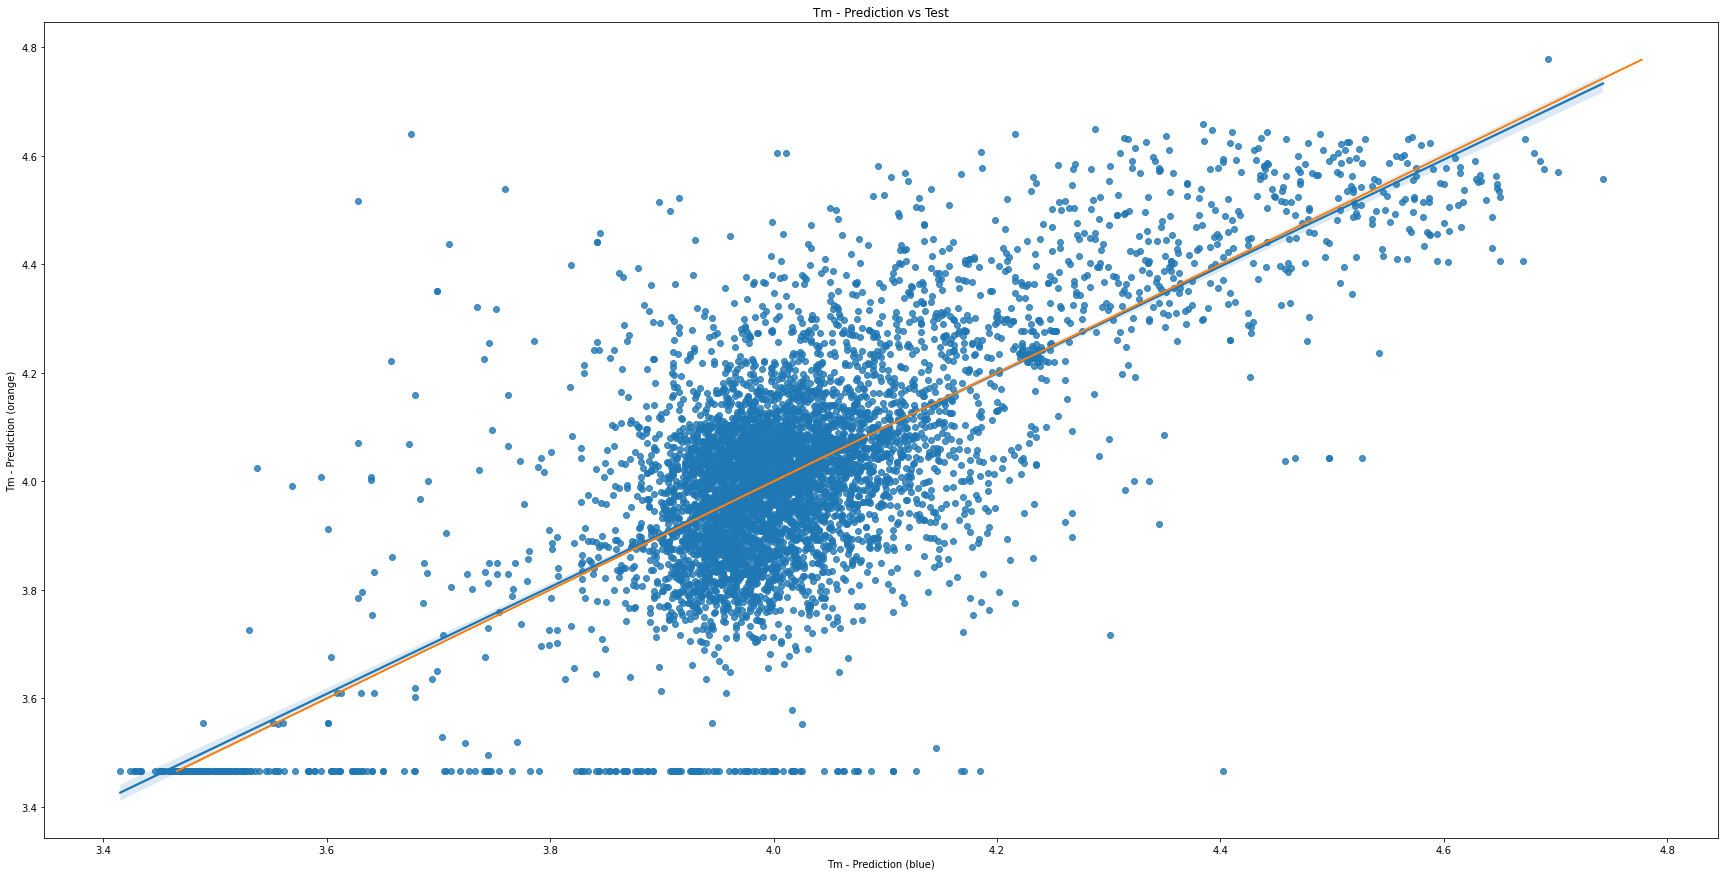

In [116]:
modele=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, max_features= 'sqrt', min_samples_split= 11, n_estimators= 500, random_state=21)
fit=modele.fit(xtrain_log,ytrain_log)
ypredict_log=fit.predict(xtest_log)
# Visualisation du modèle prédit selon les valeurs test
sns.regplot(x=ypredict_log,y=ytest_log)
# Obtenir la ligne correspondant au valeur test
plt.plot(ytest_log,ytest_log)
plt.xlabel("Tm - Prediction (blue)")
plt.ylabel("Tm - Prediction (orange)")
plt.title("Tm - Prediction vs Test")

On voit ainsi, que les droites orange et bleue sont assez proches et que le nuage de points est centré au niveau du croisement de ces deux droites. Passons maintenant à une analyse du feature importance afin de constater l'impact de notre feature engineering sur nos résultats.

# Feature Importance

In [117]:
import shap

In [118]:
explainer = shap.TreeExplainer(modele)

In [119]:
shap_values = explainer.shap_values(xtest_log)

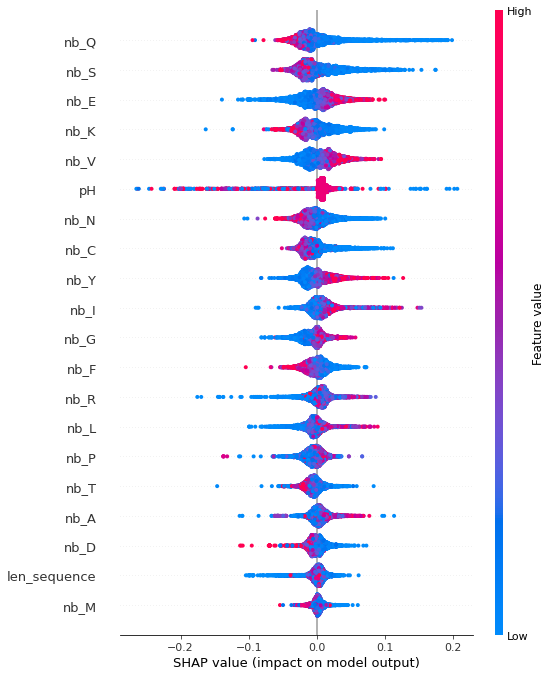

In [120]:
shap.summary_plot(shap_values, xtest_log)

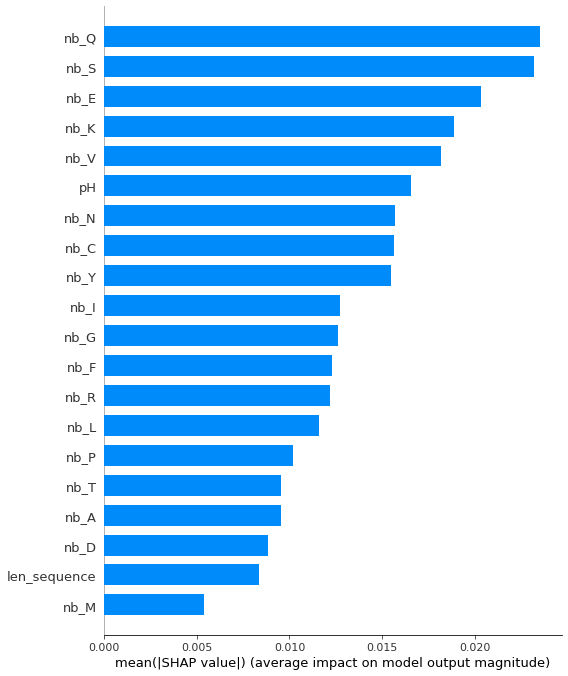

In [121]:
shap.summary_plot(shap_values, xtest_log, plot_type='bar')

On voit ici, que la feature qui à le plus d’impact est la feature du nombre de Q (Glutamine) dans la séquence protéinique. On trouve ensuite les S (Sérine), les E (Acide glutamique), les K (Lysine) , les V (Valine) et ensuite et pH. Cependant, contrairement aux acides aminés, le pH, ne semble pas impacter nos résultats de manière croissante ou décroissante, ce dernier s’étalement de manière presque égale des deux côtés de l’axe.

# Mise en place du modèle sur notre jeu de données final

In [122]:
test_enz

,seq_id,protein_sequence,pH,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,nb_D,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,10,13,19,18,6,0,8,19,6
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,10,13,19,18,6,0,7,19,6
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,220,17,8,6,22,4,15,...,3,10,13,19,18,6,0,7,19,6
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,5,15,...,3,10,13,19,18,6,0,7,19,6
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,11,13,19,18,6,0,7,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,7,0,7,19,6
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,6,0,7,19,6
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,6,0,7,20,6
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,18,8,6,21,4,15,...,3,10,13,19,18,6,0,7,19,6


In [123]:
test_enz_num=test_enz.drop(axis=1, columns=['seq_id','protein_sequence'])
test_enz__num_std = pd.DataFrame(Scaler.fit_transform(test_enz_num), columns=test_enz_num.columns)
tm_predict=fit.predict(test_enz__num_std)
tm_predict

array([4.27341037, 4.03948473, 4.09869145, ..., 3.98110278, 3.96212118,
       4.01953761])

In [124]:
test_enz['tm_log_predict']=tm_predict

In [125]:
test_enz

,seq_id,protein_sequence,pH,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,nb_D,...,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y,tm_log_predict
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,10,13,19,18,6,0,8,19,6,4.273410
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,10,13,19,18,6,0,7,19,6,4.039485
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,220,17,8,6,22,4,15,...,10,13,19,18,6,0,7,19,6,4.098691
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,5,15,...,10,13,19,18,6,0,7,19,6,4.104290
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,11,13,19,18,6,0,7,19,6,3.968739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,10,13,19,18,7,0,7,19,6,4.100292
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,10,13,19,18,6,0,7,19,6,3.941334
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,10,13,19,18,6,0,7,20,6,3.981103
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,18,8,6,21,4,15,...,10,13,19,18,6,0,7,19,6,3.962121


In [126]:
import math
tm_predict_nl=[]
for i in test_enz['tm_log_predict']:
    tm_nl=(math.exp(i))-7
    tm_predict_nl.append(tm_nl)
test_enz['tm_predict']=tm_predict_nl
test_enz

,seq_id,protein_sequence,pH,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,nb_D,...,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y,tm_log_predict,tm_predict
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,13,19,18,6,0,8,19,6,4.273410,64.765967
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,13,19,18,6,0,7,19,6,4.039485,49.797069
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,220,17,8,6,22,4,15,...,13,19,18,6,0,7,19,6,4.098691,53.261381
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,5,15,...,13,19,18,6,0,7,19,6,4.104290,53.599728
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,13,19,18,6,0,7,19,6,3.968739,45.917764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,13,19,18,7,0,7,19,6,4.100292,53.357930
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,13,19,18,6,0,7,19,6,3.941334,44.487258
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,13,19,18,6,0,7,20,6,3.981103,46.576085
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,18,8,6,21,4,15,...,13,19,18,6,0,7,19,6,3.962121,45.568716


In [127]:
sorted_test_enz=test_enz.sort_values(by='tm_predict',ascending = False)

In [128]:
final_test_enz=sorted_test_enz.drop(axis=1, columns=['len_sequence','pH','nb_P','nb_T','nb_W','nb_A','nb_C','nb_D','nb_L','nb_K','nb_H','nb_V','nb_R','nb_F','nb_Q','nb_G','nb_S','nb_I','nb_M','nb_E','nb_N','nb_Y','tm_log_predict'])

In [129]:
final_test_enz

,seq_id,protein_sequence,tm_predict
925,32315,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVD...,74.045350
577,31967,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVD...,74.045350
676,32066,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVD...,74.045350
97,31487,VPVNPEPDATSVENVALKTGSGDSQSDPIKADIEVKGQSALPFDVD...,74.045350
139,31529,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSAIPFDVD...,74.045350
...,...,...,...
379,31769,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVD...,34.951894
1014,32404,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVD...,34.951894
318,31708,VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVD...,34.951894
42,31432,VPVNPEPDATSVENVALKTGSFDSQSDPIKADLEVKGQSALPFDVD...,34.951894


In [131]:
sub=pd.read_csv(r'C:\Users\leper\OneDrive\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\sample_submission.csv', sep=',',low_memory=False)

In [132]:
sub['tm']=tm_predict_nl
sub['tm_ranked']=sub['tm'].rank(ascending = 0)
sub

,seq_id,tm,tm_ranked
0,31390,64.765967,44.0
1,31391,49.797069,1111.5
2,31392,53.261381,720.5
3,31393,53.599728,620.0
4,31394,45.917764,1745.5
...,...,...,...
2408,33798,53.357930,685.5
2409,33799,44.487258,1908.0
2410,33800,46.576085,1637.0
2411,33801,45.568716,1781.0


In [133]:
sorted_sub=sub.sort_values(by='tm_ranked',ascending = True)

In [134]:
sorted_sub

,seq_id,tm,tm_ranked
577,31967,74.045350,3.0
139,31529,74.045350,3.0
97,31487,74.045350,3.0
925,32315,74.045350,3.0
676,32066,74.045350,3.0
...,...,...,...
42,31432,34.951894,2407.0
179,31569,34.951894,2407.0
318,31708,34.951894,2407.0
524,31914,34.951894,2407.0


In [135]:
sub_prediction = sorted_sub.copy()
sub_prediction = sub_prediction.drop(axis=1, columns=['tm_ranked'])
sub_prediction

,seq_id,tm
577,31967,74.045350
139,31529,74.045350
97,31487,74.045350
925,32315,74.045350
676,32066,74.045350
...,...,...
42,31432,34.951894
179,31569,34.951894
318,31708,34.951894
524,31914,34.951894


# Conclusion

In [136]:
sub_prediction.to_csv((r'C:\Users\leper\OneDrive\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\Prediciton_tm.csv'),index=False)